# Assignment 2: Data Analysis.
## Data: Melbourne Housing Snapshot.
### Anu Ambekar, Julian Ryan, Alex Chung, Ryan Porter Markley, Ethan Graham Keirs.

## Importing libraries

In [1]:
#%pip install -U seaborn
#%pip install cufflinks

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from scipy import stats
%matplotlib inline



In [3]:
df = pd.read_csv('melb_data.csv')

In [4]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


## Data cleaning:

### Finding the amount null values for the four attributes that have null values.
- Credit: Julian Ryan

In [5]:
def remove_rows(col1, col2, col3, col4):
    count = 0
    types = df.dtypes
    for record_index in range(len(df)):
        incorrect_values = 0
        for key in df.keys():
            if key != "{}".format(col1) and key != "{}".format(col2):
                if pd.isna(df[key][record_index]):
                    incorrect_values+=1
                elif key == "{}".format(col3) or key == "{}".format(col4):
                    if df[key][record_index] == 0:
                        incorrect_values+=1
        if incorrect_values > 1:
            count+=1
            
    print(count)
    
remove_rows('BuildingArea', 'YearBuilt', 'Bedroom2', 'Bathroom')
remove_rows('Bedroom2', 'Bathroom', 'BuildingArea', 'YearBuilt')
remove_rows('Bedroom2', 'BuildingArea', 'Bathroom', 'YearBuilt')

68
5264
675


### Finding number of null values for each of these attributes, where we found null values.
- Credit: Anu Ambekar and Julian Ryan (came up with idea).

In [6]:
df['Car'].isna().sum()  
df['YearBuilt'].isna().sum()   
df['BuildingArea'].isna().sum()
df['CouncilArea'].isna().sum()   

1369

- 62 null values for Car.
- 5375 null values for Year Built.
- 6450 null values for Building Area.
- 1369 null values for Council Area.

### Filling out null values of CouncilArea by linking each council to a range of suburbs, using .isin. 
- Credit: Alex Chung

In [7]:
# Rename df CouncilArea column for later concate
df = df.rename({'CouncilArea': 'X'}, axis=1)

# pd.set_option("max_rows", None)
pd.reset_option('display.max_rows')

# Group each Suburb to the right Council
bayside=df[df['Suburb'].isin(['Beaumaris','Black Rock','Brighton','Hampton','Hampton East','Sandringham', 'Brighton East'])]
bayside.loc[:, 'CouncilArea'] = 'Bayside'

banyule=df[df['Suburb'].isin(['Bellfield','Briar Hill','Eaglemont','Heidelberg','Heidelberg Heights','Heidelberg West','Ivanhoe','Ivanhoe East','Lower Plenty','Montmorency','Rosanna','St Helena','Viewbank','Watsonia','Watsonia North','Yallambie'])]
banyule.loc[:, 'CouncilArea'] = 'Banyule'

boroondara=df[df['Suburb'].isin(['Ashburton','Balwyn','Camberwell','Canterbury','Deepdene','Hawthorn','Hawthorn East','Kew','Kew East'])]
boroondara.loc[:, 'CouncilArea'] = 'Boroondara'

brimbank=df[df['Suburb'].isin(['Albanvale','Albion','Ardeer','Cairnlea','Calder Park','Deer Park','Delahey','Derrimut','Kealba','Keilor Downs','Keilor Lodge','Keilor North','Keilor Park','Kings Park','St Albans','Sunshine','Sunshine North','Sunshine West','Sydenham','Taylors Lakes'])]
brimbank.loc[:, 'CouncilArea'] = 'Brimbank'

cardinia=df[df['Suburb'].isin(['Avonsleigh','Bayles','Beaconsfield Upper','Bunyip','Bunyip North','Caldermeade','Cardinia','Catani','Clematis','Cockatoo','Cora Lynn','Dalmore','Dewhurst','Garfield','Garfield North','Gembrook','Guys Hill','Iona','Koo Wee Rup','Koo Wee Rup North','Lang Lang East','Maryknoll','Monomeith','Mount Burnett','Nangana','Nar Nar Goon','Nar Nar Goon North','Officer','Officer South','Pakenham','Pakenham South','Pakenham Upper','Rythdale','Tonimbuk','Tynong','Tynong North','Vervale','Yannathan'])]
cardinia.loc[:, 'CouncilArea'] = 'Cardinia'

casey=df[df['Suburb'].isin(['Berwick','Blind Bight','Botanic Ridge','Cannons Creek','Clyde','Clyde North','Cranbourne','Cranbourne East','Doveton','Eumemmerring','Hallam','Harkaway','Lynbrook','Warneet','Cranbourne North','Cranbourne South','Cranbourne West','Junction Village','Hampton Park','Endeavour Hills','Devon Meadows','Lysterfield South','Narre Warren','Narre Warren South','Narre Warren North'])]
casey.loc[:, 'CouncilArea'] = 'Casey'

frankston=df[df['Suburb'].isin(['Carrum Downs','Frankston North','Frankston South','Langwarrin South','Sandhurst','Seaford','Skye','Frankston','Langwarrin'])]
frankston.loc[:, 'CouncilArea'] = 'Frankston'

darebin=df[df['Suburb'].isin(['Kingsbury','Northcote','Preston','Reservoir','Thornbury'])]
darebin.loc[:, 'CouncilArea'] = 'Darebin'

greater_dandenong=df[df['Suburb'].isin(['Bangholme','Dandenong','Dandenong North','Dandenong South','Springvale South','Noble Park North','Noble Park','Keysborough','Springvale'])]
greater_dandenong.loc[:, 'CouncilArea'] = 'Greater Dandenong'

glen_eira=df[df['Suburb'].isin(['Bentleigh','Carnegie','Caulfield','Gardenvale','Elsternwick','McKinnon','Murrumbeena','Ormond','Bentleigh East','Caulfield East','Caulfield North','Caulfield South','Glen Huntly'])]
glen_eira.loc[:, 'CouncilArea'] = 'Glen Eira'
                          
hobsons_bay=df[df['Suburb'].isin(['Altona','Newport','Seabrook','Seaholme','Spotswood','Williamstown','Williamstown North','South Kingsville','Altona Meadows','Altona North'])]
hobsons_bay.loc[:, 'CouncilArea'] = 'Hobsons Bay'
                           
wyndham=df[df['Suburb'].isin(['Cocoroc','Tarneit','Quandong','Mambourin','Werribee','Hoppers Crossing','Laverton North','Point Cook','Wyndham Vale','Williams Landing','Werribee South'])]
wyndham.loc[:, 'CouncilArea'] = 'Wyndham'
                           
hume=df[df['Suburb'].isin(['Attwood','Broadmeadows','Bulla','Campbellfield','Kalkallo','Jacana','Greenvale','Dallas','Craigieburn','Coolaroo','Mickleham','Somerton','Sunbury','Yuroke','Wildwood','Westmeadows','Meadow Heights','Melbourne Airport','Oaklands Junction','Roxburgh Park','Gladstone Park'])]
hume.loc[:, 'CouncilArea'] = 'Hume'

manningham=df[df['Suburb'].isin(['Bulleen','Doncaster','Donvale','Warrandyte','Templestowe','Templestowe Lower','Warrandyte South','Doncaster East'])]
manningham.loc[:, 'CouncilArea'] = 'Manningham'
                             
knox=df[df['Suburb'].isin(['Bayswater','Boronia','Knoxfield','Scoresby','Rowville','Wantirna','Wantirna South','The Basin','Ferntree Gully'])]
knox.loc[:, 'CouncilArea'] = 'Knox'
                            
kingston=df[df['Suburb'].isin(['Aspendale','Bonbeach','Braeside','Carrum','Chelsea','Clarinda','Edithvale','Heatherton','Mentone','Moorabbin','Mordialloc','Parkdale','Waterways','Patterson Lakes','Moorabbin Airport','Dingley Village','Clayton South','Chelsea Heights','Aspendale Gardens'])]
kingston.loc[:, 'CouncilArea'] = 'Kingston'
 
maribyrnong=df[df['Suburb'].isin(['Braybrook', 'Footscray', 'Kingsville', 'Maidstone', 'Maribyrnong', 'Seddon', 'Tottenham', 'West Footscray', 'Yarraville'])]
maribyrnong.loc[:, 'CouncilArea'] = 'Maribyrnong'
                               
maroondah=df[df['Suburb'].isin(['Bayswater North','Croydon','Ringwood','Warranwood','Croydon Hills','Croydon North','Croydon South','Kilsyth South','Ringwood East'])]
maroondah.loc[:, 'CouncilArea'] = 'Maroondah'
                               
melbourne=df[df['Suburb'].isin(['Carlton', 'Docklands', 'East Melbourne', 'Melbourne', 'North Melbourne', 'Parkville', 'West Melbourne'])]
melbourne.loc[:, 'CouncilArea'] = 'Melbourne'
                               
moreland=df[df['Suburb'].isin(['Brunswick', 'Brunswick East', 'Brunswick West', 'Coburg', 'Coburg North', 'Fawkner', 'Glenroy', 'Gowanbrae', 'Hadfield', 'Oak Park', 'Pascoe Vale','Pascoe Vale South'])]
moreland.loc[:, 'CouncilArea'] = 'Moreland'
                               
monash=df[df['Suburb'].isin(['Ashwood',  'Clayton', 'Glen Waverley', 'Hughesdale', 'Huntingdale', 'Mount Waverley', 'Mulgrave', 'Notting Hill', 'Oakleigh', 'Oakleigh East',  'Wheelers Hill'])]
monash.loc[:, 'CouncilArea'] = 'Monash'
                               
melton=df[df['Suburb'].isin(['Brookfield', 'Burnside Heights', 'Caroline Springs',  'Kurunjang', 'Melton', 'Melton South', 'Melton West', 'Rockbank', 'Taylors Hill'])]
melton.loc[:, 'CouncilArea'] = 'Melton'
                               
moonee_valley=df[df['Suburb'].isin(['Keilor East','Aberfeldie', 'Airport West', 'Ascot Vale', 'Avondale Heights', 'Essendon', 'Essendon North', 'Essendon West',  'Moonee Ponds', 'Niddrie', 'Strathmore', 'Strathmore Heights', 'Travancore'])]
moonee_valley.loc[:, 'CouncilArea'] = 'Moonee Valley'
                               
stonnington=df[df['Suburb'].isin(['Armadale', 'Kooyong', 'Malvern', 'Malvern East', 'Prahran', 'Toorak'])]
stonnington.loc[:, 'CouncilArea'] = 'Stonnington'
                               
yarra=df[df['Suburb'].isin(['Abbotsford', 'Burnley',  'Clifton Hill', 'Collingwood', 'Cremorne',  'Fitzroy', 'Princes Hill', 'Richmond'])]
yarra.loc[:, 'CouncilArea'] = 'Yarra'
                               
port_phillip=df[df['Suburb'].isin(['Albert Park', 'Balaclava', 'Elwood', 'Middle Park',  'Ripponlea', 'South Melbourne', 'St Kilda'])]
banyule.loc[:, 'CouncilArea'] = 'Banyule'
                               
whitehorse=df[df['Suburb'].isin(['Blackburn', 'Blackburn North', 'Blackburn South', 'Box Hill',  'Burwood East', 'Forest Hill', 'Mitcham',  'Vermont South'])]
whitehorse.loc[:, 'CouncilArea'] = 'Whitehorse'

whittlesea=df[df['Suburb'].isin([ 'Epping', 'Lalor', 'Mernda', 'Mill Park', 'South Morang', 'Thomastown', 'Whittlesea', 'Wollert'])]
whittlesea.loc[:, 'CouncilArea'] = 'Whittlesea'

nillumbik=df[df['Suburb'].isin(['Diamond Creek', 'Eltham',  'Hurstbridge', 'North Warrandyte'])]
nillumbik.loc[:, 'CouncilArea'] = 'Nillumbik'

yarra_ranges=df[df['Suburb'].isin(['Chirnside Park', 'Healesville', 'Montrose', 'Mooroolbark', 'Mount Evelyn', 'Silvan', 'Upwey', 'Yarra Glen'])]
yarra_ranges.loc[:, 'CouncilArea'] = 'Yarra Ranges'

macedon_ranges=df[df['Suburb'].isin(['Bullengarook', 'Gisborne', 'Riddells Creek'])]
macedon_ranges.loc[:, 'CouncilArea'] = 'Macedon Ranges'

moorabool=df[df['Suburb'].isin(['Bacchus Marsh'])]
moorabool.loc[:, 'CouncilArea'] = 'Moorabool'

part=df[df['Suburb'].isin(['Cheltenham','Oakleigh South','Eltham North', 'Greensborough','Carlton North','Alphington','Doreen','Burwood', 'Chadstone','Southbank', 'Windsor','Highett','Bundoora','Diggers Rest','Fairfield', 'Hillside','Eltham North','Flemington', 'Kensington','Upper Ferntree Gully','Port Melbourne', 'South Yarra', 'Greensborough','Macleod','Fitzroy North','Surrey Hills','Mont Albert','Balwyn North','Glen Iris','Brooklyn','Hillside','Keilor','Tullamarine','Beaconsfield','Emerald','Heath Hill','Lang Lang','Modella','Menzies Creek','Longwarry','Nyora','Tooradin','Beaconsfield','Lyndhurst','Pearcedale','Tooradin','Alphington','Fairfield','Macleod','Lyndhurst','Brighton East','St Kilda East','Laverton','Eynesbury','Truganina','Mount Cottrell','Little River','Clarkefield','Diggers Rest','Nunawading','Park Orchards','Ringwood North','Wonga Park','Lysterfield','Sassafras','Oakleigh South','Wonga Park','Vermont','Ringwood North','Park Orchards','Kilsyth'])]
part.loc[:, 'CouncilArea'] = part['X']

councilList=[banyule, bayside, boroondara, brimbank, cardinia, casey, darebin,  frankston, glen_eira, greater_dandenong, hobsons_bay, hume, kingston, maribyrnong, knox, macedon_ranges, manningham, maroondah, melbourne, melton, monash, moonee_valley, moorabool, moreland, nillumbik, part, port_phillip, stonnington, whitehorse, whittlesea, wyndham, yarra, yarra_ranges]

# Concatenate each Council to create a new dataframe with updated value for CouncilArea 
df=pd.concat(councilList, ignore_index=False)

# Drop column X which contain null values for CouncilArea
df=df.drop('X',1)

# Sort rows on index 0-13579
df=df.sort_index()

C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\891279172.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bayside.loc[:, 'CouncilArea'] = 'Bayside'
C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\891279172.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banyule.loc[:, 'CouncilArea'] = 'Banyule'
C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\891279172.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

### Replacing null values and zeros in building area with the median value, based on the type of house: house, unit or townhouse. If the null value is of a house, then the median value imputed will be the value of that of the house.
- Credit: Anu Ambekar, Alex Chung (came up with idea).

In [8]:
#df.isna().sum()
#car=df[df['Car'].isnull()]
df_h = df.loc[df["Type"]=="h"]
df_u = df.loc[df["Type"]=="u"]
df_t = df.loc[df["Type"]=="t"]

df_h['BuildingArea'].fillna(df_h['BuildingArea'].median(), inplace=True)
df_u['BuildingArea'].fillna(df_u['BuildingArea'].median(), inplace=True)
df_t['BuildingArea'].fillna(df_t['BuildingArea'].median(), inplace=True)

h_median=df_h['BuildingArea'].median()
u_median=df_u['BuildingArea'].median()
t_median=df_t['BuildingArea'].median()

df_h['BuildingArea'].replace(to_replace=0, value=h_median, inplace=True)
df_u['BuildingArea'].replace(to_replace=0, value=u_median, inplace=True)
df_t['BuildingArea'].replace(to_replace=0, value=t_median, inplace=True)

df = pd.concat([df_h, df_u, df_t])


C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\3700433188.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h['BuildingArea'].fillna(df_h['BuildingArea'].median(), inplace=True)
C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\3700433188.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_u['BuildingArea'].fillna(df_u['BuildingArea'].median(), inplace=True)
C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\3700433188.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

### Filling out null values for car spaces, based on the median car spaces for houses, units and townhouses. The process is similar to building area.
- Credit: Anu Ambekar, Alex Chung (came up with idea).

In [9]:
h_car=df_h['Car'].median()
u_car=df_u['Car'].median()
t_car=df_t['Car'].median()

df_h['Car'].fillna(df_h['Car'].median(), inplace=True)
df_u['Car'].fillna(df_u['Car'].median(), inplace=True)
df_t['Car'].fillna(df_t['Car'].median(), inplace=True)

df = pd.concat([df_h, df_u, df_t])

### Imputing a dummy variable into YearBuilt
- Credit: Anu Ambekar

In [10]:
df.at[9968, 'YearBuilt']=0

### Some landsize values were incorrect. We had to manually change these values using df.at to find the index, get the attribute that we want to be changed at that index, and then outline the value to be imputed.
- Credits: Anu Ambekar, Julian Ryan, Alex Chung

In [11]:
df.at[3318, 'Landsize']=590
df.at[10581, 'Landsize']=290
df.at[7710, 'Landsize']=869
df.at[8688, 'Landsize']=3474
df.at[11144, 'Landsize']=414
df.at[11507, 'Landsize']=543
df.at[6019, 'Landsize']=108
df.at[8364, 'Landsize']=745
df.at[10865, 'Landsize']=6090
df.at[8396, 'Landsize']=1550
df.at[10262, 'Landsize']=657
df.at[994, 'Landsize']=29
df.at[8811, 'Landsize']=df['Landsize'].median()
df.at[8709, 'Landsize']=777
df.at[10921, 'Landsize']=428
df.at[5958, 'Landsize']=360
df.at[7303, 'Landsize']=36
df.at[7743, 'Landsize']=7355
df.at[9660, 'Landsize']=36
df.at[11322, 'Landsize']=137
df.at[10166, 'Landsize']=866
df.at[4915, 'Landsize']=72
df.at[10278, 'Landsize']=2782
df.at[2007, 'Landsize']=596
df.at[10523, 'Landsize']=44
df.at[11541, 'Landsize']=45
df.at[7823, 'Landsize']=45
df.at[2664, 'Landsize']=44
df.at[4690, 'Landsize']=49
df.at[3902, 'Landsize']=36
df.at[4597, 'Landsize']=759
df.at[6553, 'Landsize']=df["Landsize"].median()
df.at[3919, 'Landsize']=53
df.at[6473, 'Landsize']=53
df.at[3952, 'Landsize']=df["Landsize"].median()
df.at[10165, 'Landsize']=54
df.at[3463, 'Landsize']=54
df.at[3954, 'Landsize']=df["Landsize"].median()
df.at[5391, 'Landsize']=54
df.at[4376, 'Landsize']=54
df.at[4425, 'Landsize']=55
df.at[3388, 'Landsize']=55
df.at[8026, 'Landsize']=54
df.at[4403, 'Landsize']=55
df.at[1369, 'Landsize']=55
df.at[6504, 'Landsize']=56
df.at[11745, 'Landsize']=44
df.at[10469, 'Landsize']=57
df.at[6383, 'Landsize']=56
df.at[5353, 'Landsize']=57
df.at[5284, 'Landsize']=58
df.at[9616, 'Landsize']=58
df.at[2704, 'Landsize']=58
df.at[11179, 'Landsize']=59
df.at[9972, 'Landsize']=60
df.at[1708, 'Landsize']=14
df.at[9539, 'Landsize']=60
df.at[11314, 'Landsize']=1323
df.at[8490, 'Landsize']=134
df.at[9057, 'Landsize']=61
df.at[13574, 'Landsize']=0

### Replacing landsizes of zero with the median landsizes for houses, units and townhouses.
- Credits: Anu Ambekar, Alex Chung (came up with the idea).

In [12]:
h_size=df_h['Landsize'].median()
u_size=df_u['Landsize'].median()
t_size=df_t['Landsize'].median()

df_h['Landsize'].fillna(df_h['Landsize'].median(), inplace=True)
df_u['Landsize'].fillna(df_u['Landsize'].median(), inplace=True)
df_t['Landsize'].fillna(df_t['Landsize'].median(), inplace=True)

df = pd.concat([df_h, df_u, df_t])

### In this dataset, the number of rooms did not have a clear patter at all, relative to the bathrooms and the bedrooms. For example, a house could have 1 bathroom, 1 bedroom and 0 rooms. So we created a pattern, that made sense such that the number of rooms was the sum of bathrooms and bedrooms in the house.
- Credit: Anu Ambekar

In [13]:
df['Rooms'] = df['Bedroom2'] + df['Bathroom']

### Changing bedroom and bathroom values using df.at again, using imputation because some of the values were false. We went to search the true values of these houses on the Internet and replaced the bedroom and bathroom values as such.
- Credits: Anu Ambekar, Julian Ryan, Alex Chung

In [14]:
df.at[135, 'Bedroom2'] = 3
df.at[804, 'Bedroom2'] = 3
df.at[827, 'Bedroom2'] = 4
df.at[913, 'Bedroom2'] = 3
df.at[2253, 'Bedroom2'] = 2
df.at[3360, 'Bedroom2'] = 4
df.at[4922, 'Bedroom2'] = 3
df.at[6170, 'Bedroom2'] = 3
df.at[6866, 'Bedroom2'] = 2
df.at[6893, 'Bedroom2'] = 3
df.at[7385, 'Bedroom2'] = 3
df.at[7494, 'Bedroom2'] = 3
df.at[8301, 'Bedroom2'] = 3
df.at[8998, 'Bedroom2'] = 5
df.at[9330, 'Bedroom2'] = 2
df.at[9917, 'Bedroom2'] = 2
df.at[11204, 'Bedroom2'] = 3
df.at[4922, 'Bedroom2'] = 3
df.at[139, 'Bathroom'] = 3
df.at[281, 'Bathroom'] = 1
df.at[505, 'Bathroom'] = 1
df.at[584, 'Bathroom'] = 2
df.at[913, 'Bathroom'] = 1
df.at[1063, 'Bathroom'] = 1
df.at[1070, 'Bathroom'] = 1
df.at[1593, 'Bathroom'] = 1
df.at[2253, 'Bathroom'] = 1
df.at[2777, 'Bathroom'] = 1
df.at[2797, 'Bathroom'] = 2
df.at[2808, 'Bathroom'] = 1
df.at[3390, 'Bathroom'] = 1
df.at[3556, 'Bathroom'] = 1
df.at[3787, 'Bathroom'] = 1
df.at[4880, 'Bathroom'] = 1
df.at[5535, 'Bathroom'] = 1
df.at[5642, 'Bathroom'] = 2
df.at[5711, 'Bathroom'] = 2
df.at[6392, 'Bathroom'] = 2
df.at[6406, 'Bathroom'] = 1
df.at[6651, 'Bathroom'] = 1
df.at[6671, 'Bathroom'] = 1
df.at[6856, 'Bathroom'] = 1
df.at[6866, 'Bathroom'] = 1
df.at[6938, 'Bathroom'] = 1
df.at[7494, 'Bathroom'] = 1
df.at[8010, 'Bathroom'] = 2
df.at[8271, 'Bathroom'] = 1
df.at[9090, 'Bathroom'] = 1
df.at[9917, 'Bathroom'] = 1
df.at[10795, 'Bathroom'] = 1
df.at[10895, 'Bathroom'] = 1
df.at[11204, 'Bathroom'] = 1

### Filling the null YearBuilt values with a dummy value of zero. 
- Credits: Anu Ambekar

In [15]:
df["YearBuilt"].fillna(0, inplace=True)
df['BuildingArea'].isna().sum()

0

### Dropping values where the number of rooms is zero. No property can have zero rooms.
- Credits: Anu Ambekar, Julian Ryan, Alex Chung

In [16]:
#Cut values where room = 0.
df=df.drop(index=913)
df=df.drop(index=2253)
df=df.drop(index=6866)
df=df.drop(index=7494)
df=df.drop(index=9917)
df=df.drop(index=11204)
df=df.reset_index(drop=True)

### Finding the amount of null values for the four attributes that registered null values. Only council area saw some null values, but the number has been approximately halved. So these null values will be culled with df.dropna in the next cell.
- Credits: Anu Ambekar, Julian Ryan, Alex Chung

In [17]:
df['Car'].isna().sum() 
df['YearBuilt'].isna().sum()  
df['BuildingArea'].isna().sum()  
df['CouncilArea'].isna().sum()   

723

- After data cleaning, there were:
- 0 null values for car.
- 0 null values for building area.
- 723 (almost half) of null values in council area.

### Using df.dropna and changing the data types of attributed that did not need to be floats, such as postcode (no decimal value for postcode) as well as propertycount, bathroom, bedroom, year built and rooms.
- Credits: Anu Ambekar

In [18]:
df=df.dropna()
df["Postcode"] = df["Postcode"].astype(int)
df["Propertycount"] = df["Propertycount"].astype(int)
df["Bathroom"] = df["Bathroom"].astype(int)
df["Bedroom2"] = df["Bedroom2"].astype(int)
df["YearBuilt"] = df["YearBuilt"].astype(int)
df['Rooms'] = df['Rooms'].astype(int)
df['Car'] = df['Car'].astype(int)

In [19]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,CouncilArea
0,Abbotsford,85 Turner St,3,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1,1,202.0,145.0,0,-37.79960,144.99840,Northern Metropolitan,4019,Yarra
1,Abbotsford,25 Bloomburg St,3,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1,0,156.0,79.0,1900,-37.80790,144.99340,Northern Metropolitan,4019,Yarra
2,Abbotsford,5 Charles St,5,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,2,0,134.0,150.0,1900,-37.80930,144.99440,Northern Metropolitan,4019,Yarra
3,Abbotsford,40 Federation La,5,h,850000.0,PI,Biggin,4/03/2017,2.5,3067,...,2,1,94.0,145.0,0,-37.79690,144.99690,Northern Metropolitan,4019,Yarra
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067,...,1,2,120.0,142.0,2014,-37.80720,144.99410,Northern Metropolitan,4019,Yarra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13684,Coburg,373 Moreland Rd,3,t,770000.0,PI,Ray,26/08/2017,6.7,3058,...,1,1,600.0,130.0,0,-37.75356,144.94970,Northern Metropolitan,11204,Moreland
13685,Gowanbrae,24 Duranta Dr,7,t,655000.0,S,Nelson,26/08/2017,12.9,3043,...,3,2,170.0,215.0,2017,-37.70128,144.90187,Western Metropolitan,1071,Moreland
13686,McKinnon,36A Windsor Av,6,t,1655000.0,S,Buxton,26/08/2017,11.4,3204,...,2,2,361.0,130.0,0,-37.91406,145.04865,Southern Metropolitan,2397,Glen Eira
13687,Mount Waverley,2/392 Stephensons Rd,5,t,1035000.0,SP,McGrath,26/08/2017,14.2,3149,...,2,2,236.0,138.0,2006,-37.88678,145.12748,Eastern Metropolitan,13366,Monash


### Creating separate columns for month and year so we can do calculations for these individual attributes.
- Credits: Anu Ambekar

In [20]:
def get_month(m):
    return m.split("/")[1]

def get_year(y):
    return y.split("/")[2]

df["Month"] = df["Date"].apply(lambda x: f"{get_month(x)}")
df["Year"] = df["Date"].apply(lambda x: f"{get_year(x)}")


#df.head()

### Changing month to date-time
- Credits: Anu Ambekar

In [21]:
df["Month"] = pd.to_datetime(df["Month"], format="%m").dt.month_name()

In [22]:
df["Month/Year"] = df["Month"] + " " + df["Year"]

### Further imputation, where unreasonable values were found.
- Credits: Anu Ambekar

In [23]:
df=df.loc[df["Price"]!=9000000]
df.at[6677, 'YearBuilt'] = 0
df_nozero=df.loc[df["YearBuilt"]>1196]
df.at[1927, 'Car'] = 2
df.at[1927, 'Date'] = "27/8/2016"
df.at[1927, 'Price']=1520000
df.at[1805, 'Price']=1350000
df.at[7404, 'Bedroom2']=2

### Creating functions for all the types graphs being used in this notebook so that large amounts of text are not repeated. 
- Credits: Anu Ambekar

In [27]:
def boxplot(data, x, y):
    sns.boxplot(data=data, x=data[x], y=data[y])

In [28]:
def sortvalues_mean(data, groupby_var, sortval_var, var, top):
    dframe=data.groupby(groupby_var).mean().sort_values(sortval_var, ascending=False)[var][0:top]
    return dframe

In [29]:
def sortvalues_count(data, groupby_var, sortval_var, var, top):
    dframe=data.groupby(groupby_var).count().sort_values(sortval_var, ascending=False)[var][0:top]
    return dframe

In [30]:
def countplot(x, data, title, xlabel, ylabel, rotation):
    sns.countplot(x=x, data=data)
    sns.set_style("dark")
    plt.xticks(rotation=rotation)
    plt.title("{}".format(title))
    plt.xlabel("{}".format(xlabel))
    plt.ylabel("{}".format(ylabel))
    plt.figure(figsize=(20, 18))

In [31]:
def barplot(data, variable, x, y):
    data=df.sort_values("{}".format(variable), ascending=False)
    sns.barplot(data=df_size, x=x, y=y)
    plt.xticks(rotation="vertical")
    plt.show()

- For further analysis to determine the amount of sales in given months and years, we have created separate attributes called Month and Year, because the exact date would make it more difficult to undergo analysis.

In [32]:
(df['Suburb'].value_counts())[0:3]
(df['Suburb'].value_counts())[-3:]

Rockbank        1
Bullengarook    1
Healesville     1
Name: Suburb, dtype: int64

In [34]:
df['Price'].median()

903000.0

In [35]:
df_h['Price'].median()  
df_u['Price'].median()  
df_t['Price'].median()  

850750.0

### Credits: Anu Ambekar
- Median property price in Melbourne is \$903000.
- The three mapboxes shown above demonstrate the physical location of all the sold properties based on different attributes. 
- The first mapbox shows the prices of each and every single listing between 2016 and 2017 based on colour. The second mapbox shows the average selling price of properties for each suburb, shown by size (large dot means large average price). The last mapbox shows the distances of every property from the CBD.
- Reservoir, Brighton East and Richmond sold the most properties.
- Rockbank, Bullengarook and Healesville sold the least properties.
- The median prices of houses, units and townhouses are \\$1090000, \\$561000 and \\$850750 respectively.

## Council-based analysis:
- Credits: Anu Ambekar

In [36]:
(df.groupby("CouncilArea").count().sort_values("Propertycount", ascending=False))["Propertycount"][0:5]

CouncilArea
Moreland         1250
Boroondara       1222
Moonee Valley    1073
Darebin          1000
Glen Eira         896
Name: Propertycount, dtype: int64

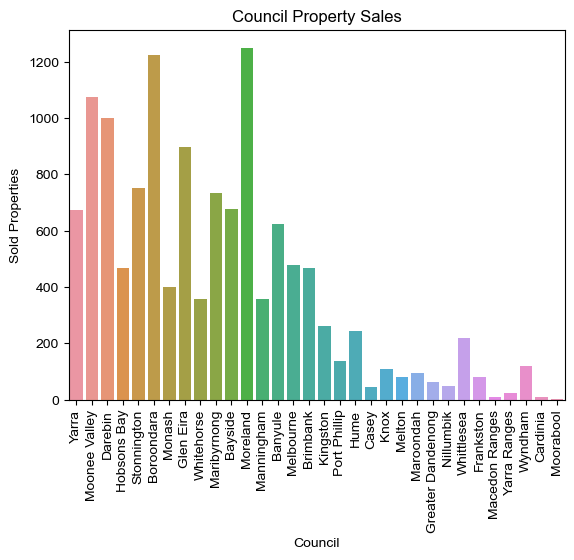

<Figure size 2000x1800 with 0 Axes>

In [37]:
countplot('CouncilArea', df, 'Council Property Sales', 'Council', 'Sold Properties', 'vertical')

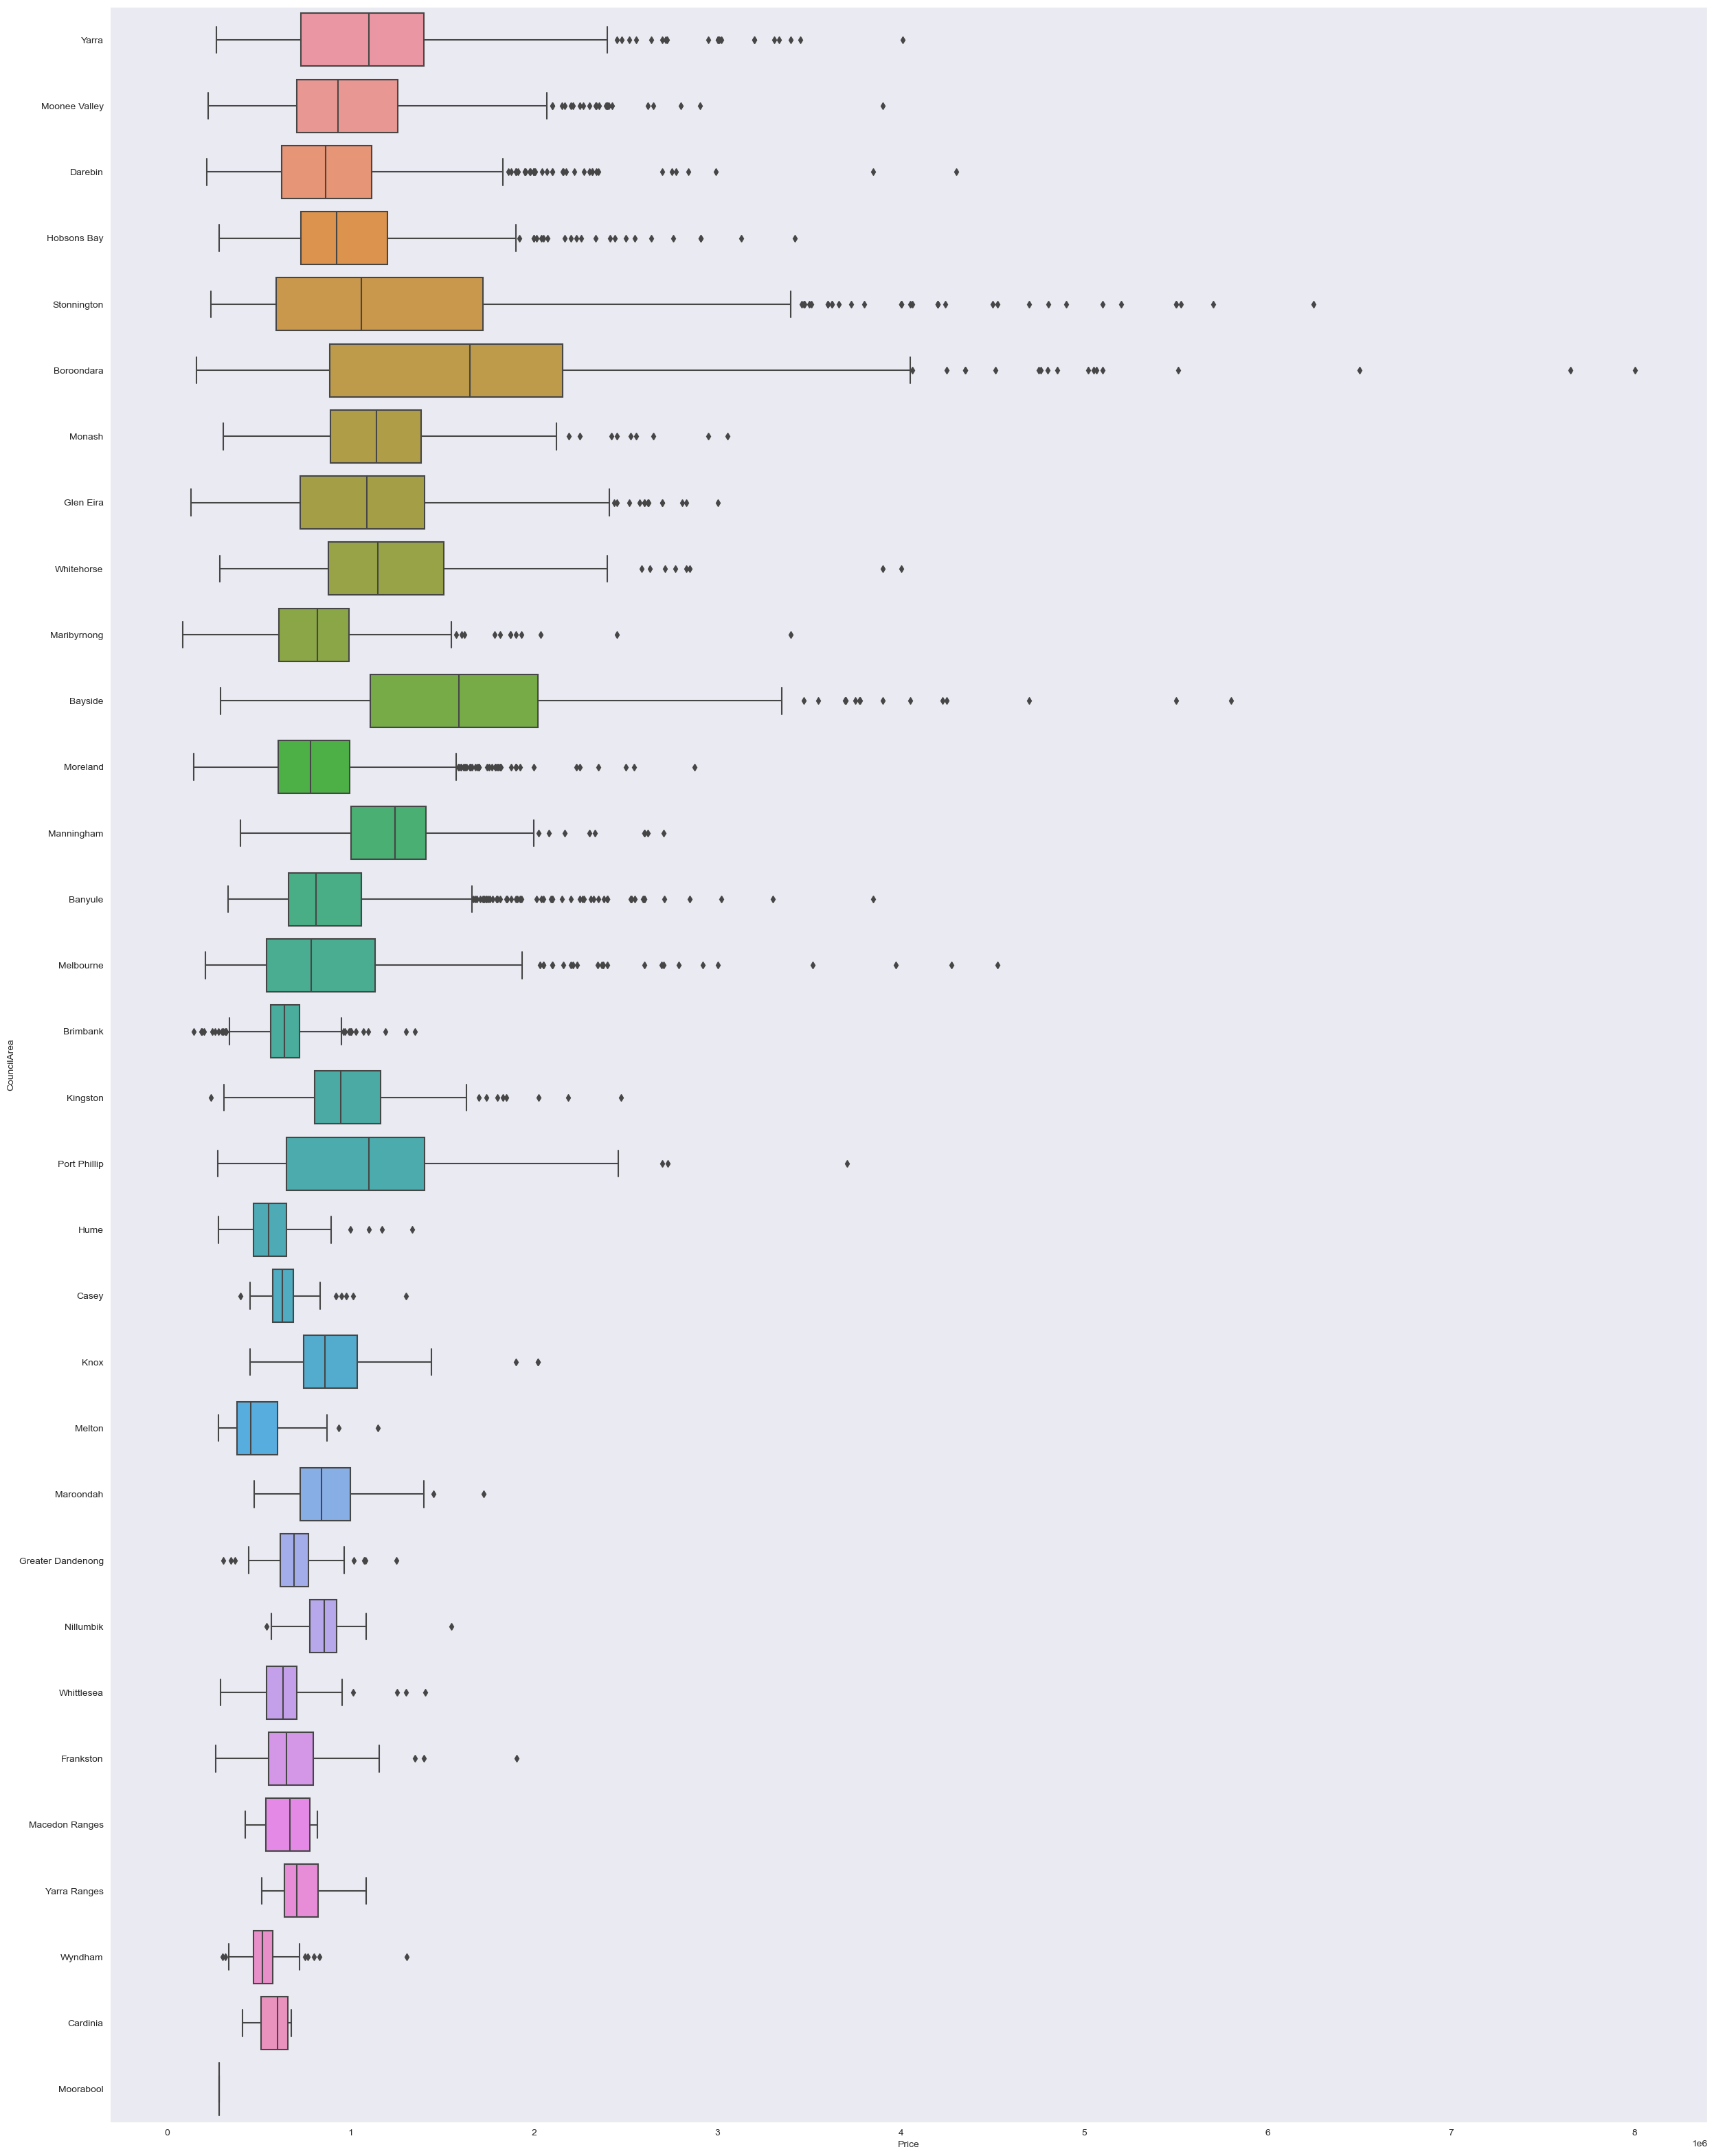

In [38]:
plt.figure(figsize=(30,40))
boxplot(df, "Price", 'CouncilArea')

In [41]:
(df.groupby("CouncilArea").mean().sort_values("Landsize", ascending=False)["Landsize"])[0:1]
sortvalues_mean(df, 'CouncilArea', 'Landsize', 'Landsize', 2)

C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\748930841.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\1386289528.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



CouncilArea
Macedon Ranges    7296.200000
Yarra Ranges      6103.590909
Name: Landsize, dtype: float64

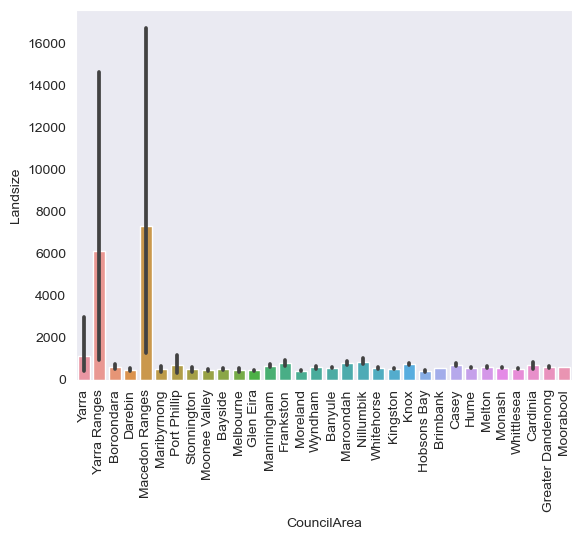

In [42]:
df_size=df.sort_values("Landsize", ascending=False)
barplot(df_size, 'Landsize', 'CouncilArea', 'Landsize')

In [43]:
(df.groupby("CouncilArea").mean().sort_values("Price", ascending=False)["Price"])[0:1]

C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\3334964683.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



CouncilArea
Boroondara    1.676508e+06
Name: Price, dtype: float64

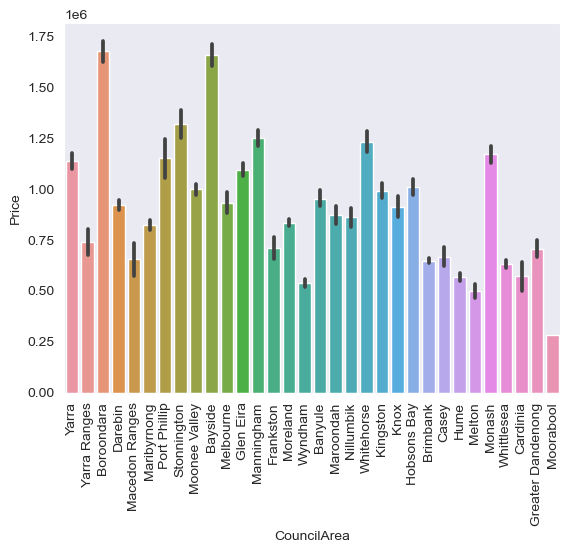

In [44]:
df_price=df.sort_values("Price", ascending=False)
barplot(df_price, 'Price', 'CouncilArea', 'Price')

### Credits: Anu Ambekar
- Moreland has sold the most properties, followed by Boroondara and Moonee Valley.
- Boroondara on average, had the most expensive properties.
- The countplot displays which councils sold how many properties.
- The treemap shows which suburbs are in which council. The larger the box, the more sales there were.
- The boxplot suggests that although Moreland council sold the most properties, it did not have a very large interquartile range.
- Stonnington, Boroondara, Bayside and Port Phillip have large interquartile ranges. Boroondara has the highest median price of properties sold in the area, as well as the largest interquartile range and the largest maximum value.
- This mapbox shows where the councils are based on colour.
- The first barplot shows that the Macedon Ranges and Yarra Ranges had property sales with the highest median land size.

## Room quantity statistics
- Credits: Anu Ambekar

In [45]:
sortvalues_count(df, 'Rooms', 'Type', 'Type', 1)

Rooms
4    3660
Name: Type, dtype: int64

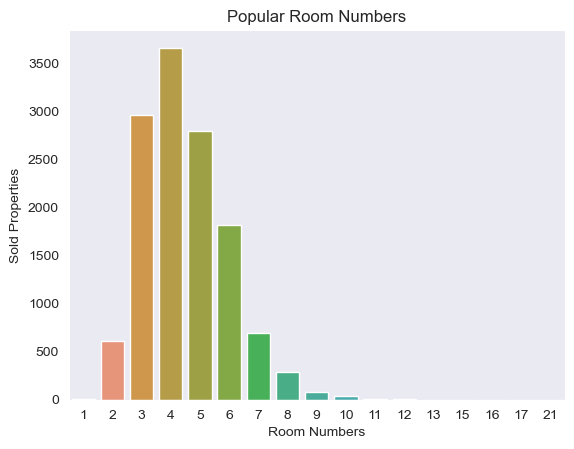

<Figure size 2000x1800 with 0 Axes>

In [46]:
#Which room qunatity is the most common?

countplot('Rooms', df, 'Popular Room Numbers', 'Room Numbers', 'Sold Properties', 'horizontal')

### Properties with four rooms were the most commonly sold.
- Credits: Anu Ambekar

<Axes: xlabel='Rooms'>

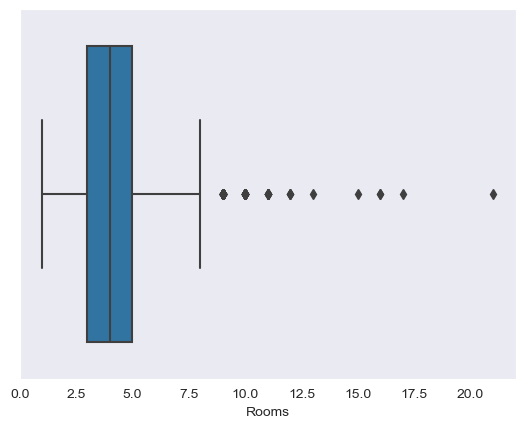

In [47]:
sns.boxplot(x="Rooms", data=df)

### The minimum number of rooms was 0 rooms and the maximum number of rooms was 7(ish) rooms as per this boxplot.

## Seller statistics:
- Credits: Anu Ambekar

In [48]:
df["SellerG"].value_counts()[0:20]

Nelson           1551
Jellis           1289
hockingstuart    1098
Barry             998
Ray               683
Buxton            622
Marshall          570
Biggin            383
Brad              342
Woodards          294
Fletchers         285
Jas               242
Sweeney           215
Noel              198
Miles             196
McGrath           175
RT                175
Hodges            173
Harcourts         165
Greg              163
Name: SellerG, dtype: int64

- Nelson, Jellis and Hocking Stuart sold the most properties.
- Most properties had 4 rooms.

### Here is a countplot showing the sellers, and how many properties they sold:
- Credits: Anu Ambekar

In [49]:
plt.subplots(figsize=(100, 110))
sns.countplot(data=df, x=df["SellerG"])
plt.xticks(rotation="vertical")
plt.show()

### This is a mapbox showing every single company in Melbourne and how successful they were:
- Credits: Anu Ambekar

### Most common types of properties:
- Credits: Anu Ambekar

### Houses were the most highly sold, with townhouses in second and units in third place.

### Most successful month in 2016: 
- Credits: Anu Ambekar

In [53]:
((df.loc[df["Year"] == "2016"]).groupby("Month").count().sort_values("Propertycount", ascending=False))["Propertycount"][0:1]

Month
November    1074
Name: Propertycount, dtype: int64

### Property sales by month in 2016:
- Credits: Anu Ambekar

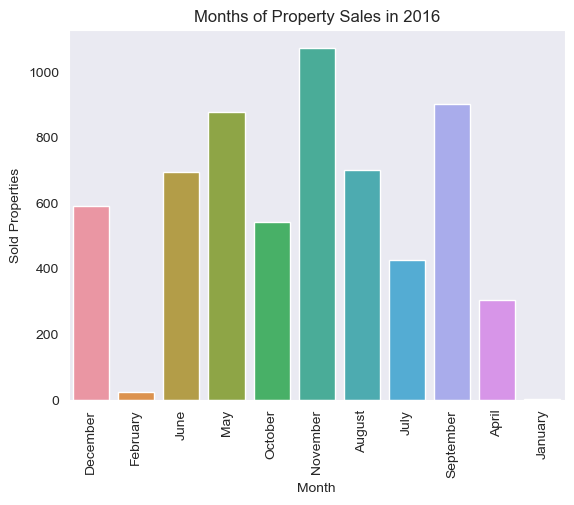

<Figure size 2000x1800 with 0 Axes>

In [54]:
df2016 = df.loc[df["Year"] == "2016"]
countplot('Month', df2016, "Months of Property Sales in 2016", "Month", "Sold Properties", 'vertical')

### Most successful month in 2017:
- Credits: Anu Ambekar

In [55]:
df2017 = df.loc[df["Year"] == "2017"]
sortvalues_count(df2017, 'Month', 'Propertycount', 'Propertycount', 1)

Month
July    1501
Name: Propertycount, dtype: int64

### Countplot describing property sales in 2017:
- Credits: Anu Ambekar

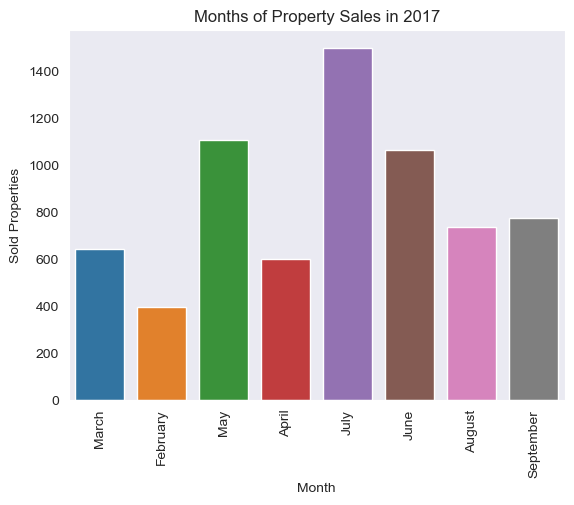

<Figure size 2000x1800 with 0 Axes>

In [56]:
countplot('Month', df2017, "Months of Property Sales in 2017", "Month", "Sold Properties", 'vertical')

### Graphing sales trends throughout every month/year in the dataset:
- Credits: Anu Ambekar

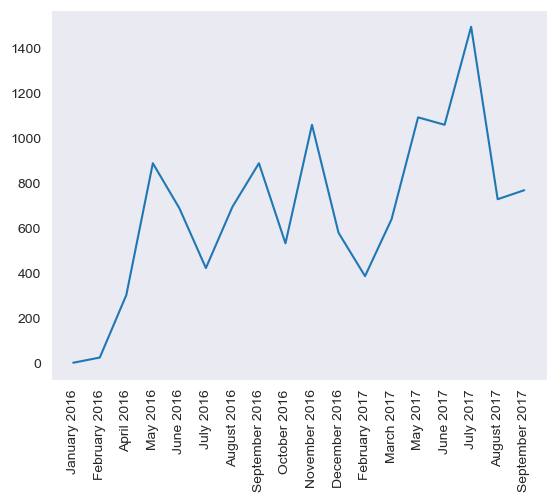

In [57]:
sortvalues_count(df, 'Month/Year', 'Type', 'Type', 20)

x = ["January 2016", "February 2016", "April 2016", "May 2016", "June 2016", "July 2016", "August 2016", "September 2016", 
     "October 2016", "November 2016", "December 2016", "February 2017", "March 2017", "May 2017", "June 2017",
    "July 2017", "August 2017", "September 2017"]

y = [2, 25, 303, 889, 689, 423, 695, 889, 533, 1060, 580, 387, 640, 1093, 1060, 1496, 729, 769, ]


plt.plot(x, y)
sns.set_style("dark")
plt.xticks(rotation="vertical")
plt.show()

- The line plot shows how many properties were sold each month as shown in the dataset, based on month and year.
- July was the most successful month in 2017 with 1501 sales.
- November was the most successful month in 2016, with 1074 sales.
- The first treemap abovemost, shows the sellers of each property based on colour.
- The next treemap displays the types of houses sold around Melbourne. The units are more concentrated, the nearer to the CBD.

### Most popular region name:
- Credits: Anu Ambekar

In [58]:
df["Regionname"].value_counts()

Southern Metropolitan         4192
Northern Metropolitan         3844
Western Metropolitan          2931
Eastern Metropolitan          1436
South-Eastern Metropolitan     443
Eastern Victoria                52
Northern Victoria               36
Western Victoria                32
Name: Regionname, dtype: int64

### Treemap displaying suburbs and the area they are in:
- Credits: Anu Ambekar

### Boxplot of region names and price:
- Credits: Anu Ambekar

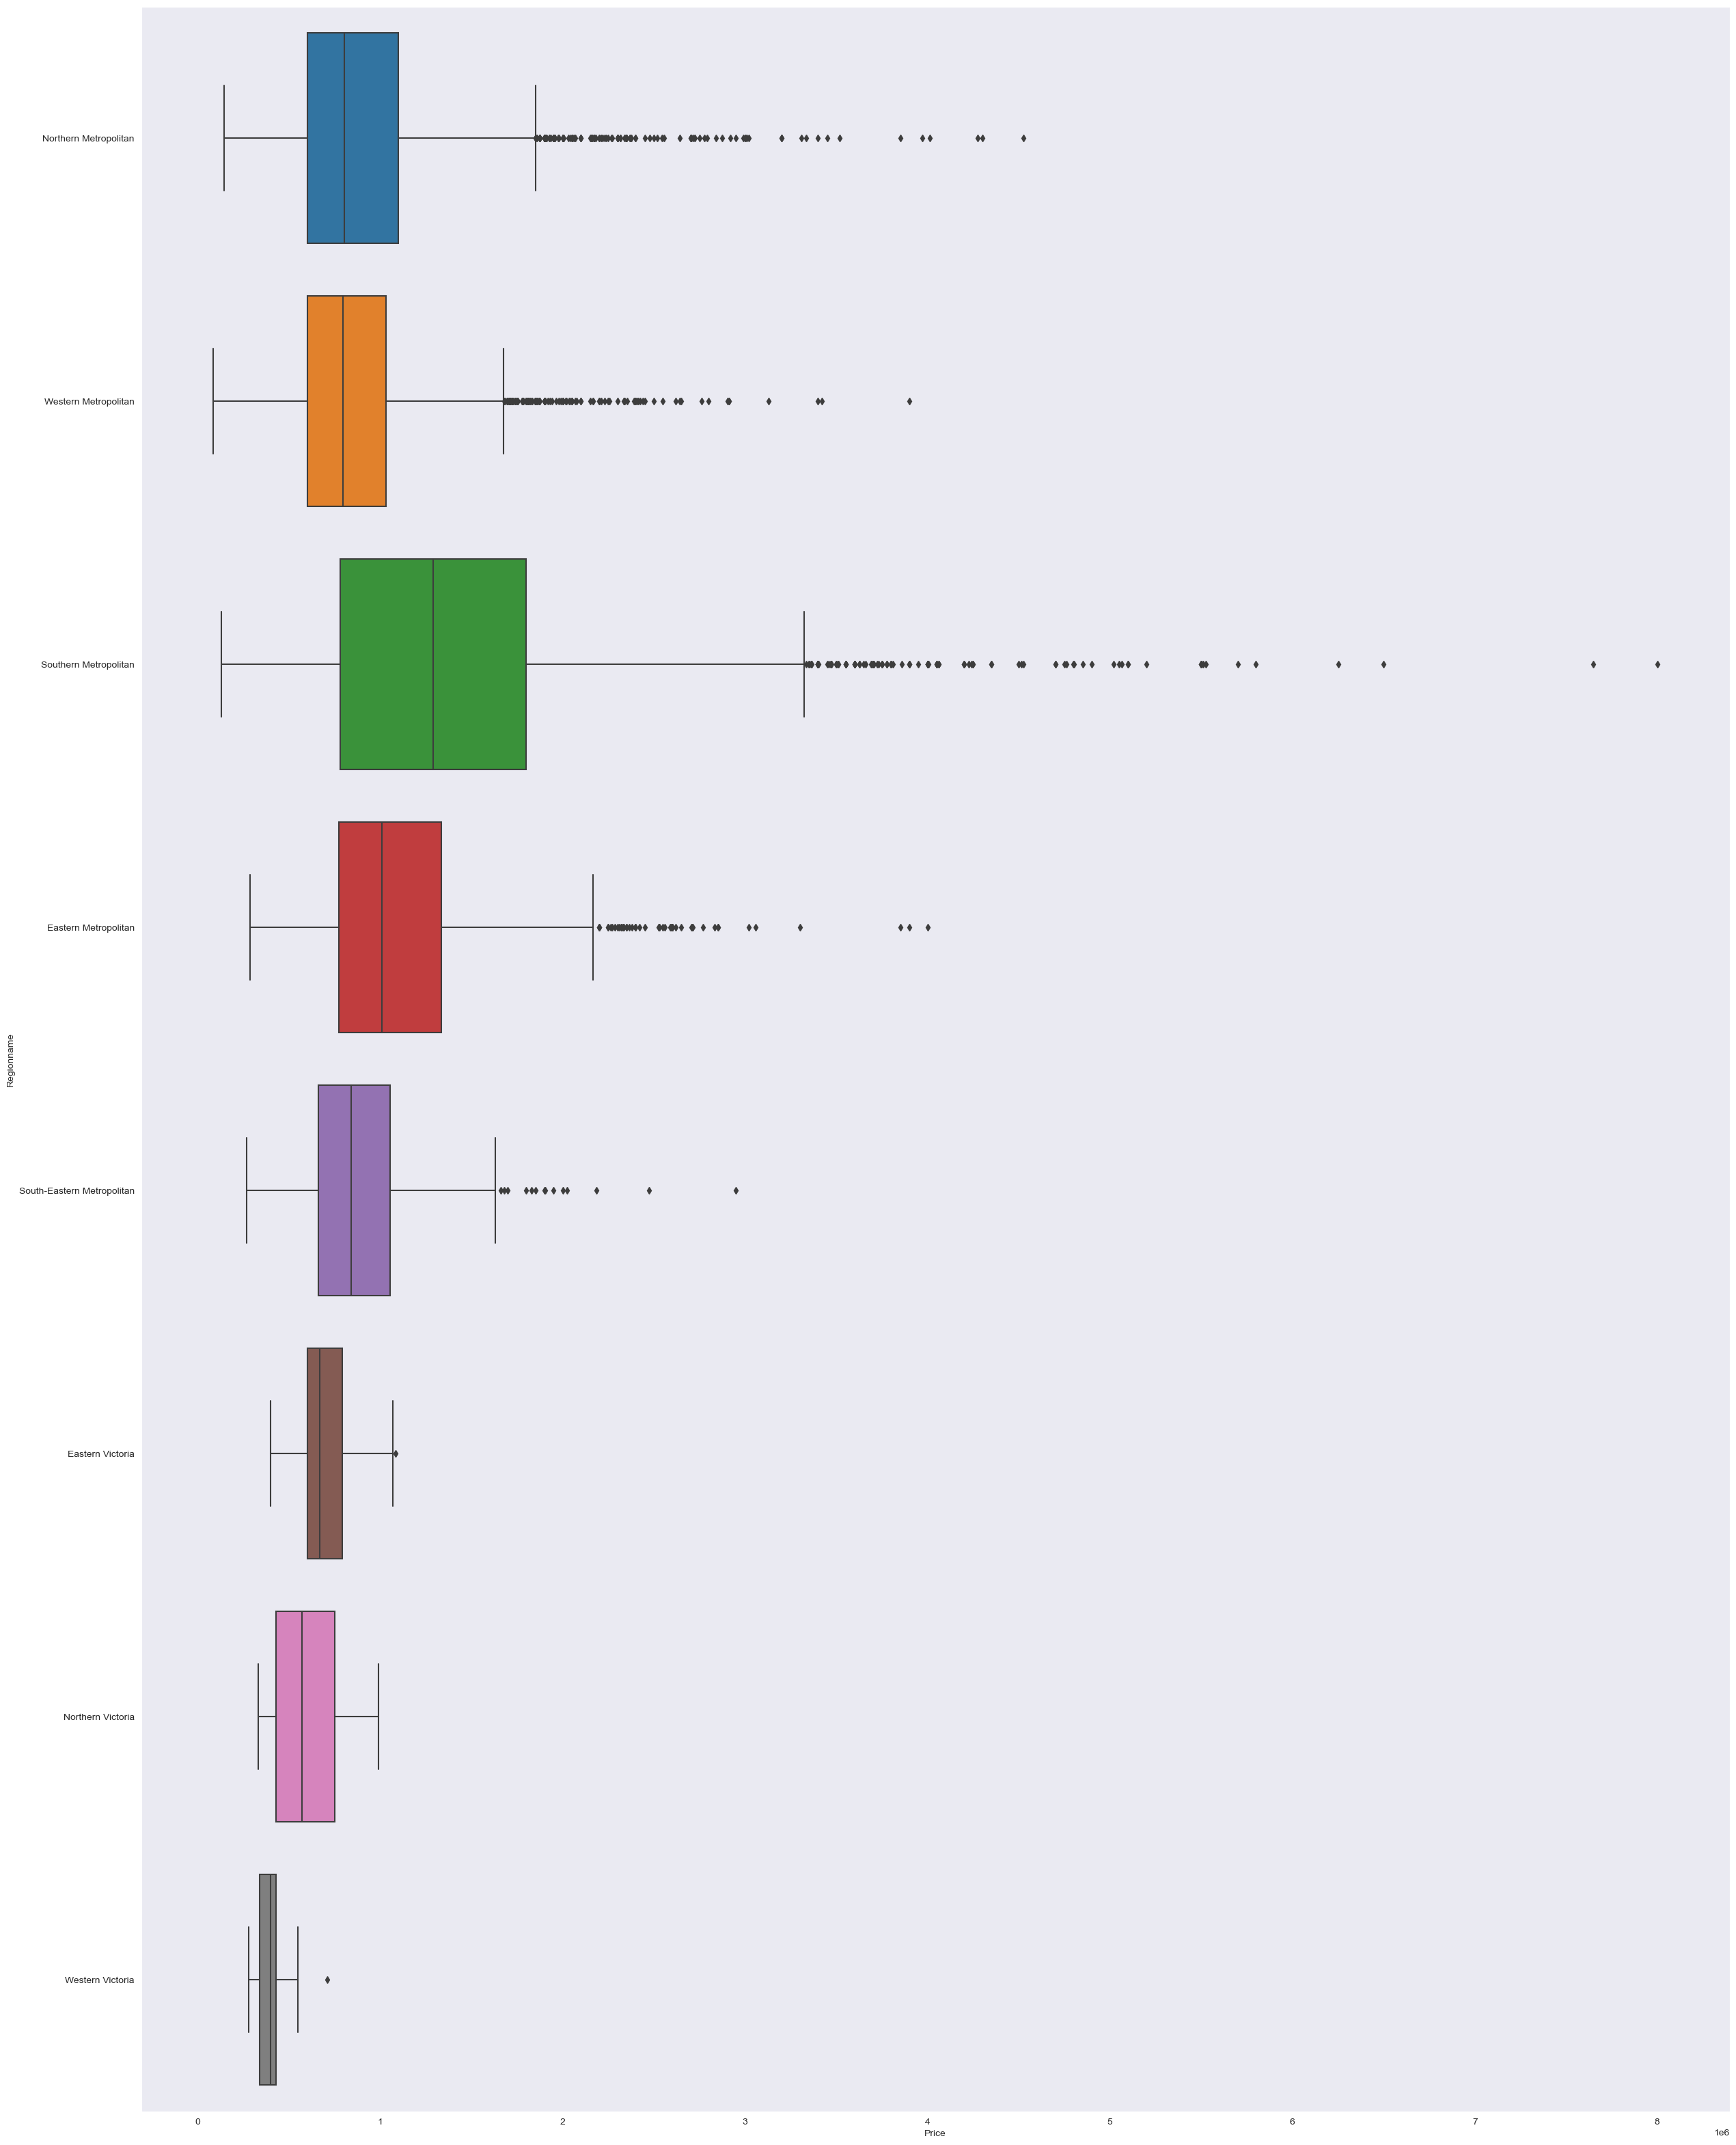

In [62]:
plt.figure(figsize=(30,40))
boxplot(df, "Price", "Regionname")

In [63]:
(df.groupby("Regionname").mean().sort_values("Landsize", ascending=False))["Landsize"]

C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\3995460655.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Regionname
Eastern Victoria              2975.442308
Northern Victoria             2545.611111
Western Victoria               655.500000
Eastern Metropolitan           630.924095
South-Eastern Metropolitan     612.693002
Northern Metropolitan          567.253642
Southern Metropolitan          526.795802
Western Metropolitan           492.621290
Name: Landsize, dtype: float64

- S (property sold) was the most common form of sale method.
- Northern, Eastern and Western Victoria had the lowest number of sales with more land bought while the metropolitan areas had high sales but less land was bought. Also because this is a Melbourne dataset and does not include much of regional Victoria.
- Southern Metropolitan sold the most properties so therefore, it had the highest interquartile range.
- The box plot even shows that the Southern Metropolitan area has the highest median price and maximum price.

### Median prices and average land sizes:
- Credits: Anu Ambekar

In [65]:
(df.groupby("Suburb").median().sort_values("Price", ascending=False))["Price"][0:1]

C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\3525427056.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Suburb
Kooyong    2185000.0
Name: Price, dtype: float64

### Which suburb had the highest median price (Top 20)?
- Credits: Anu Ambekar

In [66]:
(df.groupby("Suburb").median().sort_values("Price", ascending=False))["Price"][0:20]

C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\1519412997.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Suburb
Kooyong          2185000.0
Eaglemont        1901000.0
Canterbury       1890000.0
Balwyn           1850000.0
Brighton         1773500.0
Kew East         1750000.0
Ivanhoe East     1740000.0
Sandringham      1710000.0
Princes Hill     1700000.0
Balwyn North     1700000.0
Camberwell       1695000.0
Ashburton        1658500.0
Glen Iris        1650000.0
Beaumaris        1635500.0
Hampton          1612500.0
Malvern          1611000.0
Mont Albert      1587000.0
Brighton East    1585000.0
Surrey Hills     1570000.0
Kew              1528500.0
Name: Price, dtype: float64

### Which suburb on average has the largest average size properties?
- Credits: Anu Ambekar

In [67]:
(df.groupby("Suburb").mean().sort_values("BuildingArea", ascending=False))["BuildingArea"][0:5]

C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\647596117.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Suburb
Pakenham          332.666667
Riddells Creek    272.400000
Clarinda          265.250000
Bulleen           262.098592
Kooyong           242.000000
Name: BuildingArea, dtype: float64

- Kooyong has the highest median price at 1858500.
- Pakenham had the largest average size properties, followed by Riddells Creek, Clarinda, Bulleen and Kooyong. This was possibly due to lower sales in the area.

In [68]:
sortvalues_count(df_h, 'SellerG', 'Price', 'Price', 1) 
sortvalues_count(df_u, 'SellerG', 'Price', 'Price', 1) 
sortvalues_count(df_t, 'SellerG', 'Price', 'Price', 1) 

SellerG
Nelson    134
Name: Price, dtype: int64

### Nelson sold the highest number of homes at 85. Hocking Stuart sold the highest number of units at 194. Nelson sold the highest number of townhouses at 85.

In [69]:
sortvalues_count(df_h, 'Regionname', 'Price', 'Price', 1) 
sortvalues_count(df_u, 'Regionname', 'Price', 'Price', 1) 
sortvalues_count(df_t, 'Regionname', 'Price', 'Price', 1) 

Regionname
Southern Metropolitan    441
Name: Price, dtype: int64

In [70]:
sortvalues_count(df_h, 'CouncilArea', 'Price', 'Price', 1)

CouncilArea
Moreland    914
Name: Price, dtype: int64

In [71]:
sortvalues_count(df_u, 'CouncilArea', 'Price', 'Price', 1)

CouncilArea
Stonnington    361
Name: Price, dtype: int64

In [72]:
sortvalues_count(df_t, 'CouncilArea', 'Price', 'Price', 1)

CouncilArea
Moreland    148
Name: Price, dtype: int64

- The Southern Metropolitan region saw the highest number of houses, units and townhouses being sold at:
    - 1220 houses.
    - 742 units.
    - 204 townhouses.
- The council of Moreland sold the most houses at 914. 
- The council of Stonnington sold the most units. 361.
- The council of Moreland sold the most townhouses. 148.
- The seller Nelson sold the most houses and townhouses at 1160 and 134.
- The seller Hocking Stuart sold the most units at 397.

- Sold, sold prior and sold prior not disclosed were the most common methods of sale across houses, units and townhouses. For houses, property sold prior and sold prior not disclosed were same percentage.
- Vendor bid and sold after auction were the least popular forms of sale method.

In [76]:
sortvalues_mean(df_h, "SellerG", "Price", "Price", 1) 
sortvalues_mean(df_u, "SellerG", "Price", "Price", 1) 
sortvalues_mean(df_t, "SellerG", "Price", "Price", 1) 

C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\1386289528.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\1386289528.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\1386289528.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



SellerG
Castran    2175000.0
Name: Price, dtype: float64

- Sotheby's had the highest average prices of sales. $3858333.0.

- Scott had the highest average prices of sales. $1860000.0.

- Castran had the highest average prices of sales. $2175000.0.

## Boxplots of bathrooms, bedrooms, rooms and car spaces on property price:
- Credits: Anu Ambekar

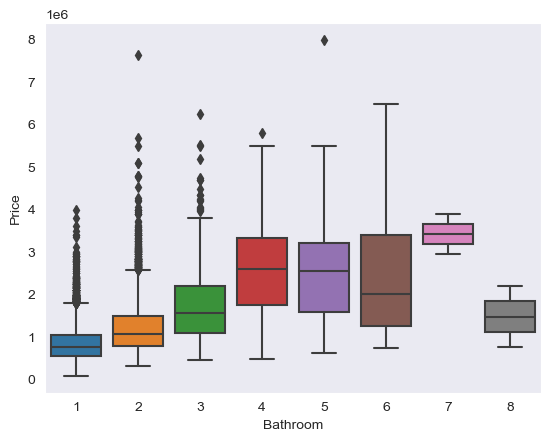

In [79]:
boxplot(df, 'Bathroom', 'Price')

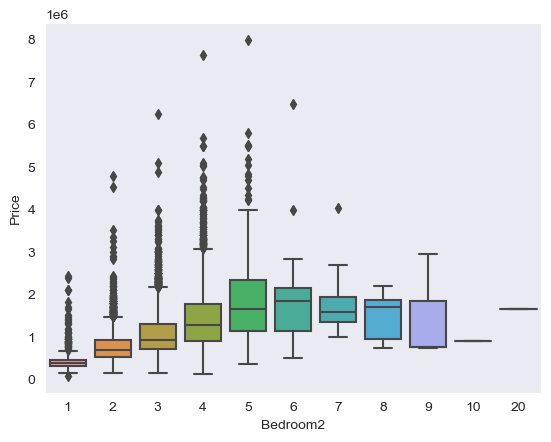

In [80]:
boxplot(df, 'Bedroom2', 'Price')

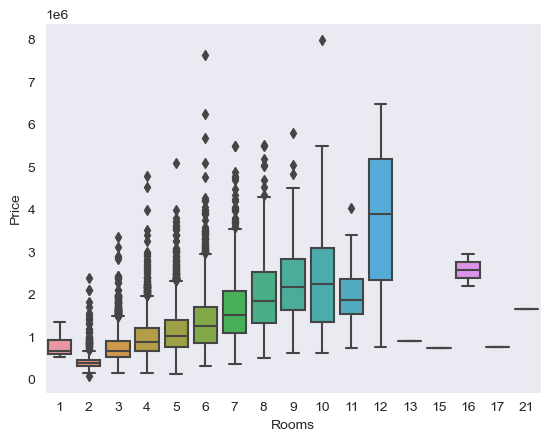

In [81]:
boxplot(df, 'Rooms', 'Price')

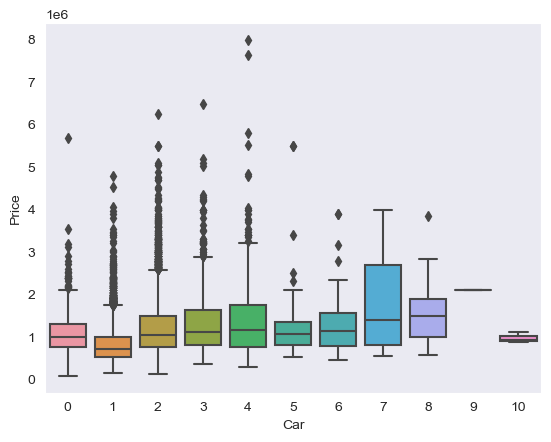

In [82]:
boxplot(df, 'Car', 'Price')

- While looking at the number of bathrooms with price, the maximum values rise until 7 bathrooms. Houses with 6, 5 and 4 bathrooms have the highest interquartile range. The interquartile range increases for 1, 2 and 3 bathrooms. The interquartile ranges drop off at 7 and 8 bathrooms.

- For bedrooms: the interquartile ranges seem to increase from 1 to 4 bedrooms. After 5 bedrooms, there is no visisble pattern.

- Rooms: the interquartile ranges reamin of similar size but houses become more expensive the more rooms, from 2 rooms up to 10 rooms. With 12 rooms: we see the largest upper quartile. 

- Car spaces: houses do not become more expensive as a result of car spaces necessarily, as there is very little change and no observable pattern.

- The most expensive house has 4 car spots, 10 rooms in total, with 5 bedrooms and 5 bathrooms.

## Suburb-based data as well as year-built based data:
- Credits: Anu Ambekar

In [83]:
sortvalues_mean(df, "Suburb", "Price", "Price", 1)

C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\1386289528.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Suburb
Kooyong    2185000.0
Name: Price, dtype: float64

In [84]:
df.sort_values("Price", ascending=False)[0:1]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,CouncilArea,Month,Year,Month/Year
5125,Canterbury,49 Mangarra Rd,10,h,8000000.0,VB,Sotheby's,13/05/2017,9.0,3126,...,464.3,1880,-37.8179,145.0694,Southern Metropolitan,3265,Boroondara,May,2017,May 2017


In [85]:
df.sort_values("Price", ascending=True)[0:1]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,CouncilArea,Month,Year,Month/Year
10172,Footscray,202/51 Gordon St,2,u,85000.0,PI,Burnham,3/09/2016,6.4,3011,...,75.0,2007,-37.7911,144.89,Western Metropolitan,7570,Maribyrnong,September,2016,September 2016


In [86]:
df_nozero.sort_values("YearBuilt", ascending=True)[0:1]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,CouncilArea,Month,Year,Month/Year
9962,Collingwood,2/79 Oxford St,3,u,855000.0,S,Nelson,3/09/2016,1.6,3066,...,122.0,1830,-37.8042,144.9845,Northern Metropolitan,4553,Yarra,September,2016,September 2016


In [87]:
df_nozero.sort_values("YearBuilt", ascending=False)[0:1]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount,CouncilArea,Month,Year,Month/Year
933,Brighton East,8 Thomas St,7,h,1310000.0,S,Buxton,24/09/2016,10.7,3187,...,250.0,2018,-37.9182,145.0231,Southern Metropolitan,6938,Bayside,September,2016,September 2016


In [88]:
df_nozero.groupby("YearBuilt").count().sort_values("Suburb", ascending=False)["Suburb"][0:1]

YearBuilt
1970    825
Name: Suburb, dtype: int64

In [89]:
sortvalues_mean(df, 'Suburb', 'Rooms', 'Rooms', 1)

C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\1386289528.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Suburb
North Warrandyte    7.0
Name: Rooms, dtype: float64

- Kooyong has the highest average property prices. \$2185000.0.
- Canterbury has the most expensive house. \$8000000.0.
- Footscray saw the most cheap listing, which was a unit at just \$85,000.
- Oldest property is in Collingwood. Property was built in 1830.
- Most recent property was built in 2018. Property must have been purchased in 2016 before it was built.
- Most properties in this dataset were built in 1970. 825 properties.
- North Warrandyte on average has the most rooms in properties sold. 7.0.

In [90]:
df_18=df_nozero.loc[df_nozero["YearBuilt"]<1900]
sortvalues_count(df_18, 'Suburb', 'YearBuilt', 'YearBuilt', 1)

Suburb
Brunswick    22
Name: YearBuilt, dtype: int64

In [91]:
df_20=df_nozero.loc[df_nozero["YearBuilt"]>=2000]
sortvalues_count(df_20, 'Suburb', 'YearBuilt', 'YearBuilt', 1)

Suburb
Richmond    68
Name: YearBuilt, dtype: int64

In [92]:
sortvalues_count(df_u, 'Suburb', 'Type', 'Type', 1)

Suburb
South Yarra    146
Name: Type, dtype: int64

In [93]:
sortvalues_count(df_u, 'Rooms', 'Type', 'Type', 8)

Rooms
2    1944
1     613
3     454
4      21
6       1
8       1
Name: Type, dtype: int64

In [94]:
(df_u.groupby('Bathroom').count().sort_values("Type", ascending=False))['Type']

Bathroom
1.0    2457
2.0     549
0.0      17
3.0      10
4.0       1
Name: Type, dtype: int64

In [95]:
sortvalues_count(df_t, 'Suburb', 'Type', 'Type', 1)

Suburb
Bentleigh East    47
Name: Type, dtype: int64

In [96]:
sortvalues_count(df_t, 'Rooms', 'Type', 'Type', 7)

Rooms
3    635
2    320
4    156
1     12
5      5
Name: Type, dtype: int64

In [97]:
(df_t.groupby('Bathroom').count().sort_values("Type", ascending=False))['Type']

Bathroom
2.0    697
1.0    319
3.0    107
4.0      3
0.0      2
Name: Type, dtype: int64

In [98]:
sortvalues_count(df_h, 'Suburb', 'Type', 'Type', 1)

Suburb
Reservoir    253
Name: Type, dtype: int64

In [99]:
sortvalues_count(df_h, 'Rooms', 'Type', 'Type', 1)

Rooms
3    4827
Name: Type, dtype: int64

In [100]:
df_h.groupby("Bathroom").count().sort_values("Type", ascending=False)["Type"]

Bathroom
1.0    4779
2.0    3769
3.0     828
4.0     105
5.0      29
0.0      15
6.0       5
7.0       2
8.0       2
Name: Type, dtype: int64

### Function to show different types of attribute combinations and their occurrences in the dataset.
- Credit: Anu Ambekar

In [101]:
def comb(data, x, y):
    new_data=(((((data.groupby([x, y]).size().reset_index().rename(columns={0: 'Count'}))).sort_values('Count', ascending=False)).reset_index(drop=True)))[0:1]
    return new_data

In [102]:
comb(df_h, 'Bedroom2', 'Bathroom') 
comb(df_u, 'Bedroom2', 'Bathroom') 
comb(df_t, 'Bedroom2', 'Bathroom') 

,Bedroom2,Bathroom,Count
0,3.0,2.0,497


- Richmond has the most properties built in the 2000s. 68 properties.
- South Yarra has the most units. 146 units.
- Most units have 2 bedrooms.
- Most units have 1 bathroom. 2441.
- This combination of bedrooms and bathrooms are most common for units (1627).
- Bentleigh East has the most townhouses. 47. 
- Most townhouses have 3 bedrooms in total.
- Most townhouses have 2 bathrooms.
- This combination of bedrooms and bathrooms are most common for townhouses (497).
- Reservoir has the most houses. 253.
- Most houses have 3 bedrooms.
- Most houses have 1 bathroom.
- This combination of bedrooms and bathrooms are most common for houses (2936).
- Brunswick has the most properties from the 1800s, sold between 2016 and 2017. 22 properties.

## Correlations:
- Credits: Anu Ambekar

In [104]:
def heatmap(data):
    plt.figure(figsize=(25,20))
    sns.set_context("paper", font_scale=1.4)
    data_mx = data.corr()
    sns.heatmap(data_mx, annot=True, cmap="Blues")

C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\687331683.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



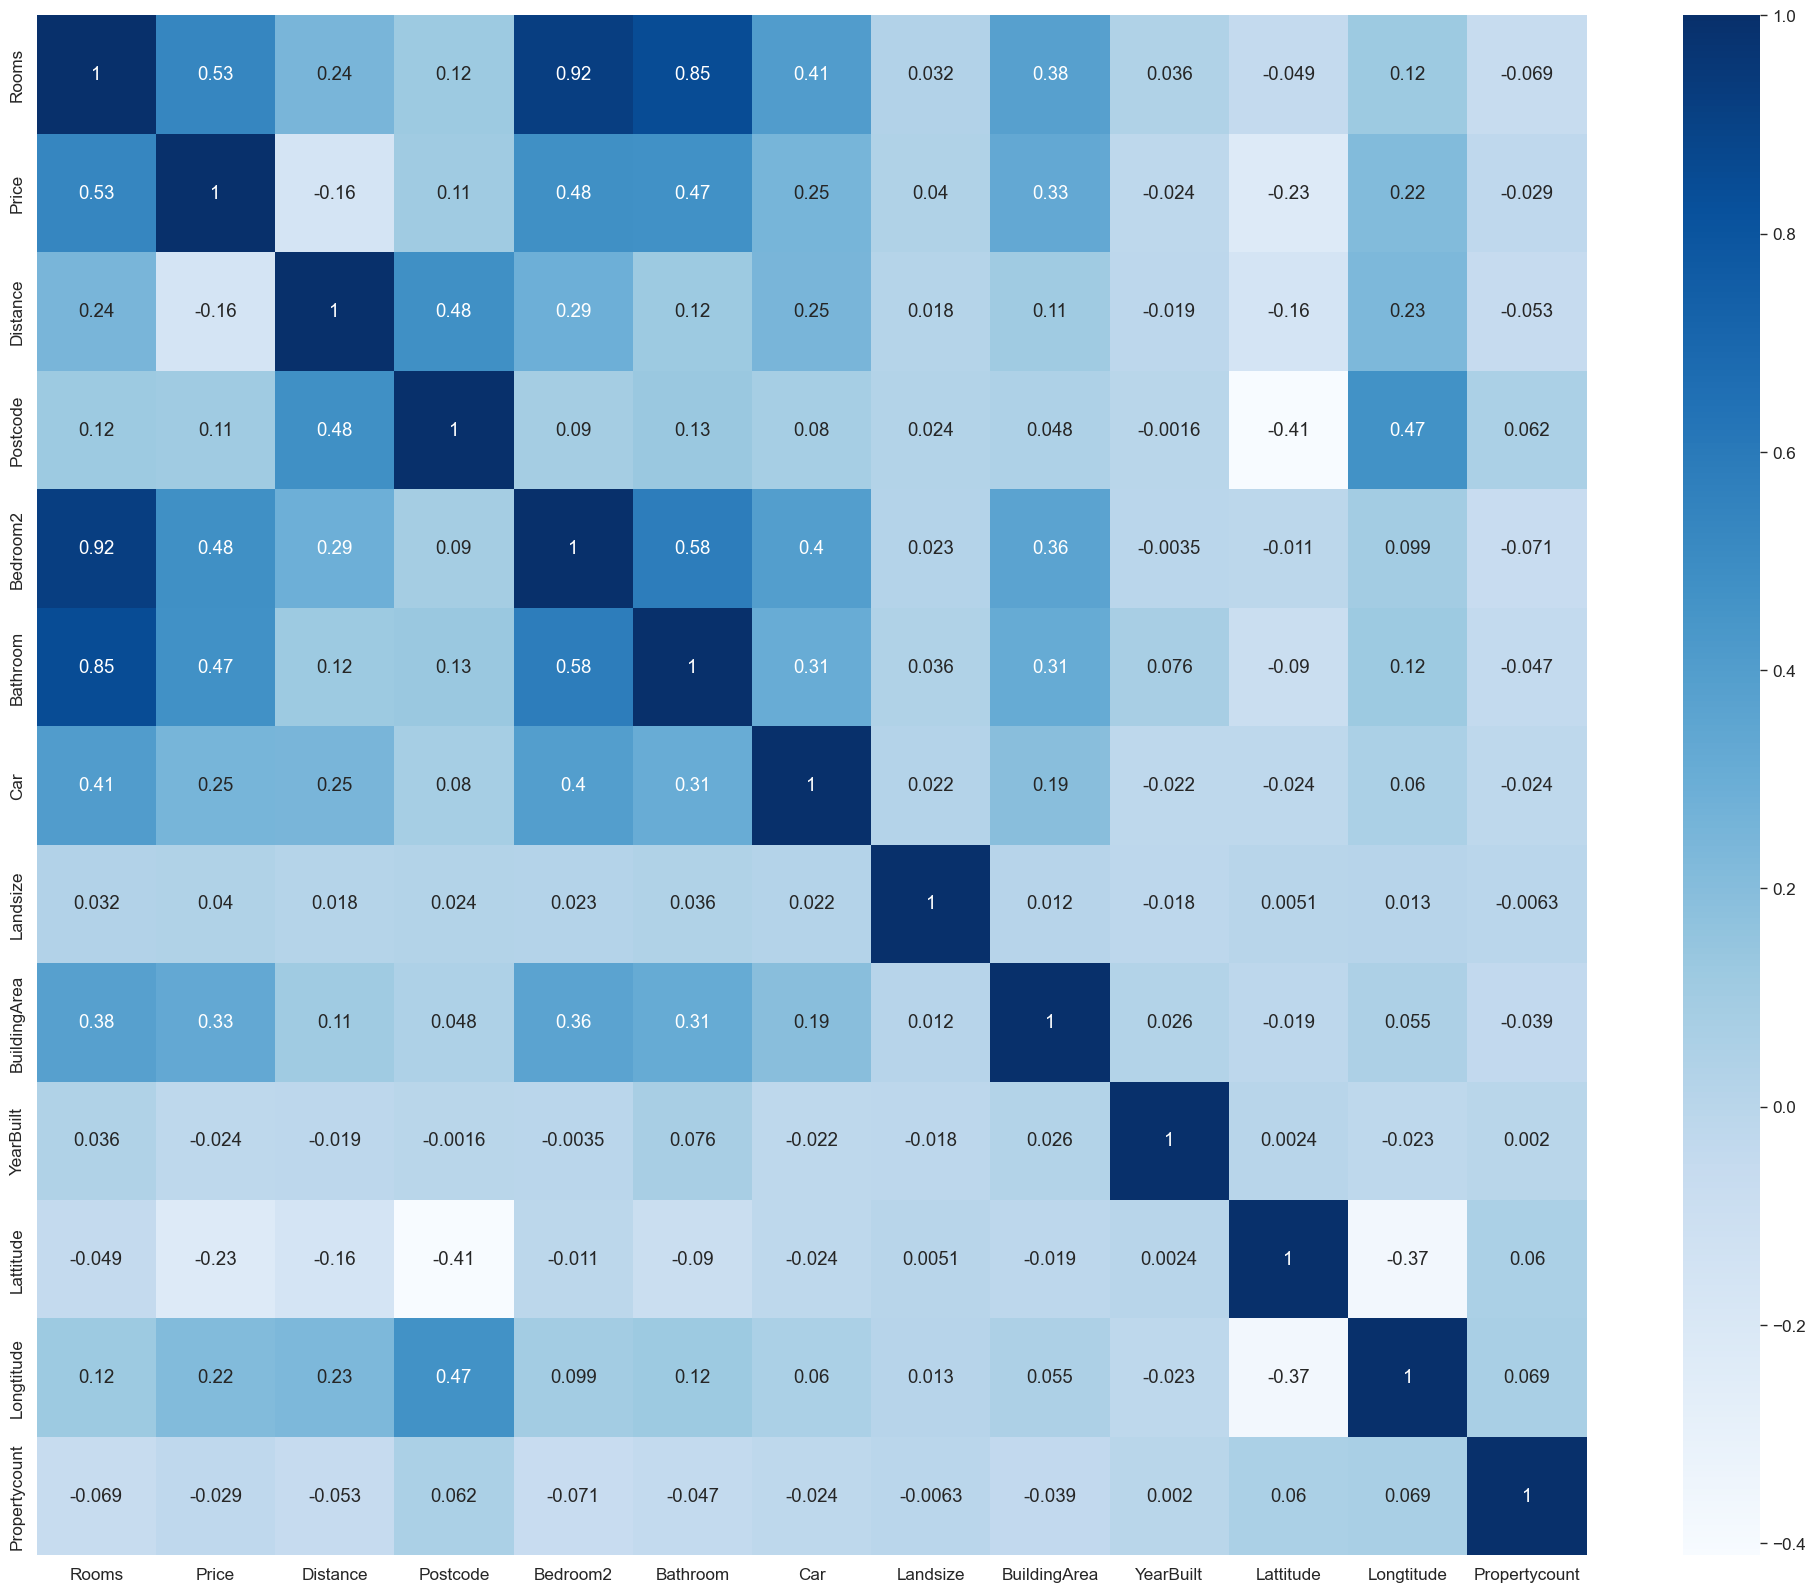

In [105]:
#Heatmap to display all pearson correlations.
heatmap(df)

### This heatmap above shows Pearson correlations. -1 is negative correlation. 1 is positive correlation. 0 is no correlation.

In [106]:
resevoir=df.loc[df["Suburb"] == "Reservoir"]
richmond=df.loc[df["Suburb"] == "Richmond"]
brighteast=df.loc[df["Suburb"] == "Brighton East"]

### Correlations can be inaccurate for all of Melbourne so we are taking heatmaps for the most popular suburbs to find out more accurate results. (Reservoir, Richmond and Brunswick).


C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\687331683.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



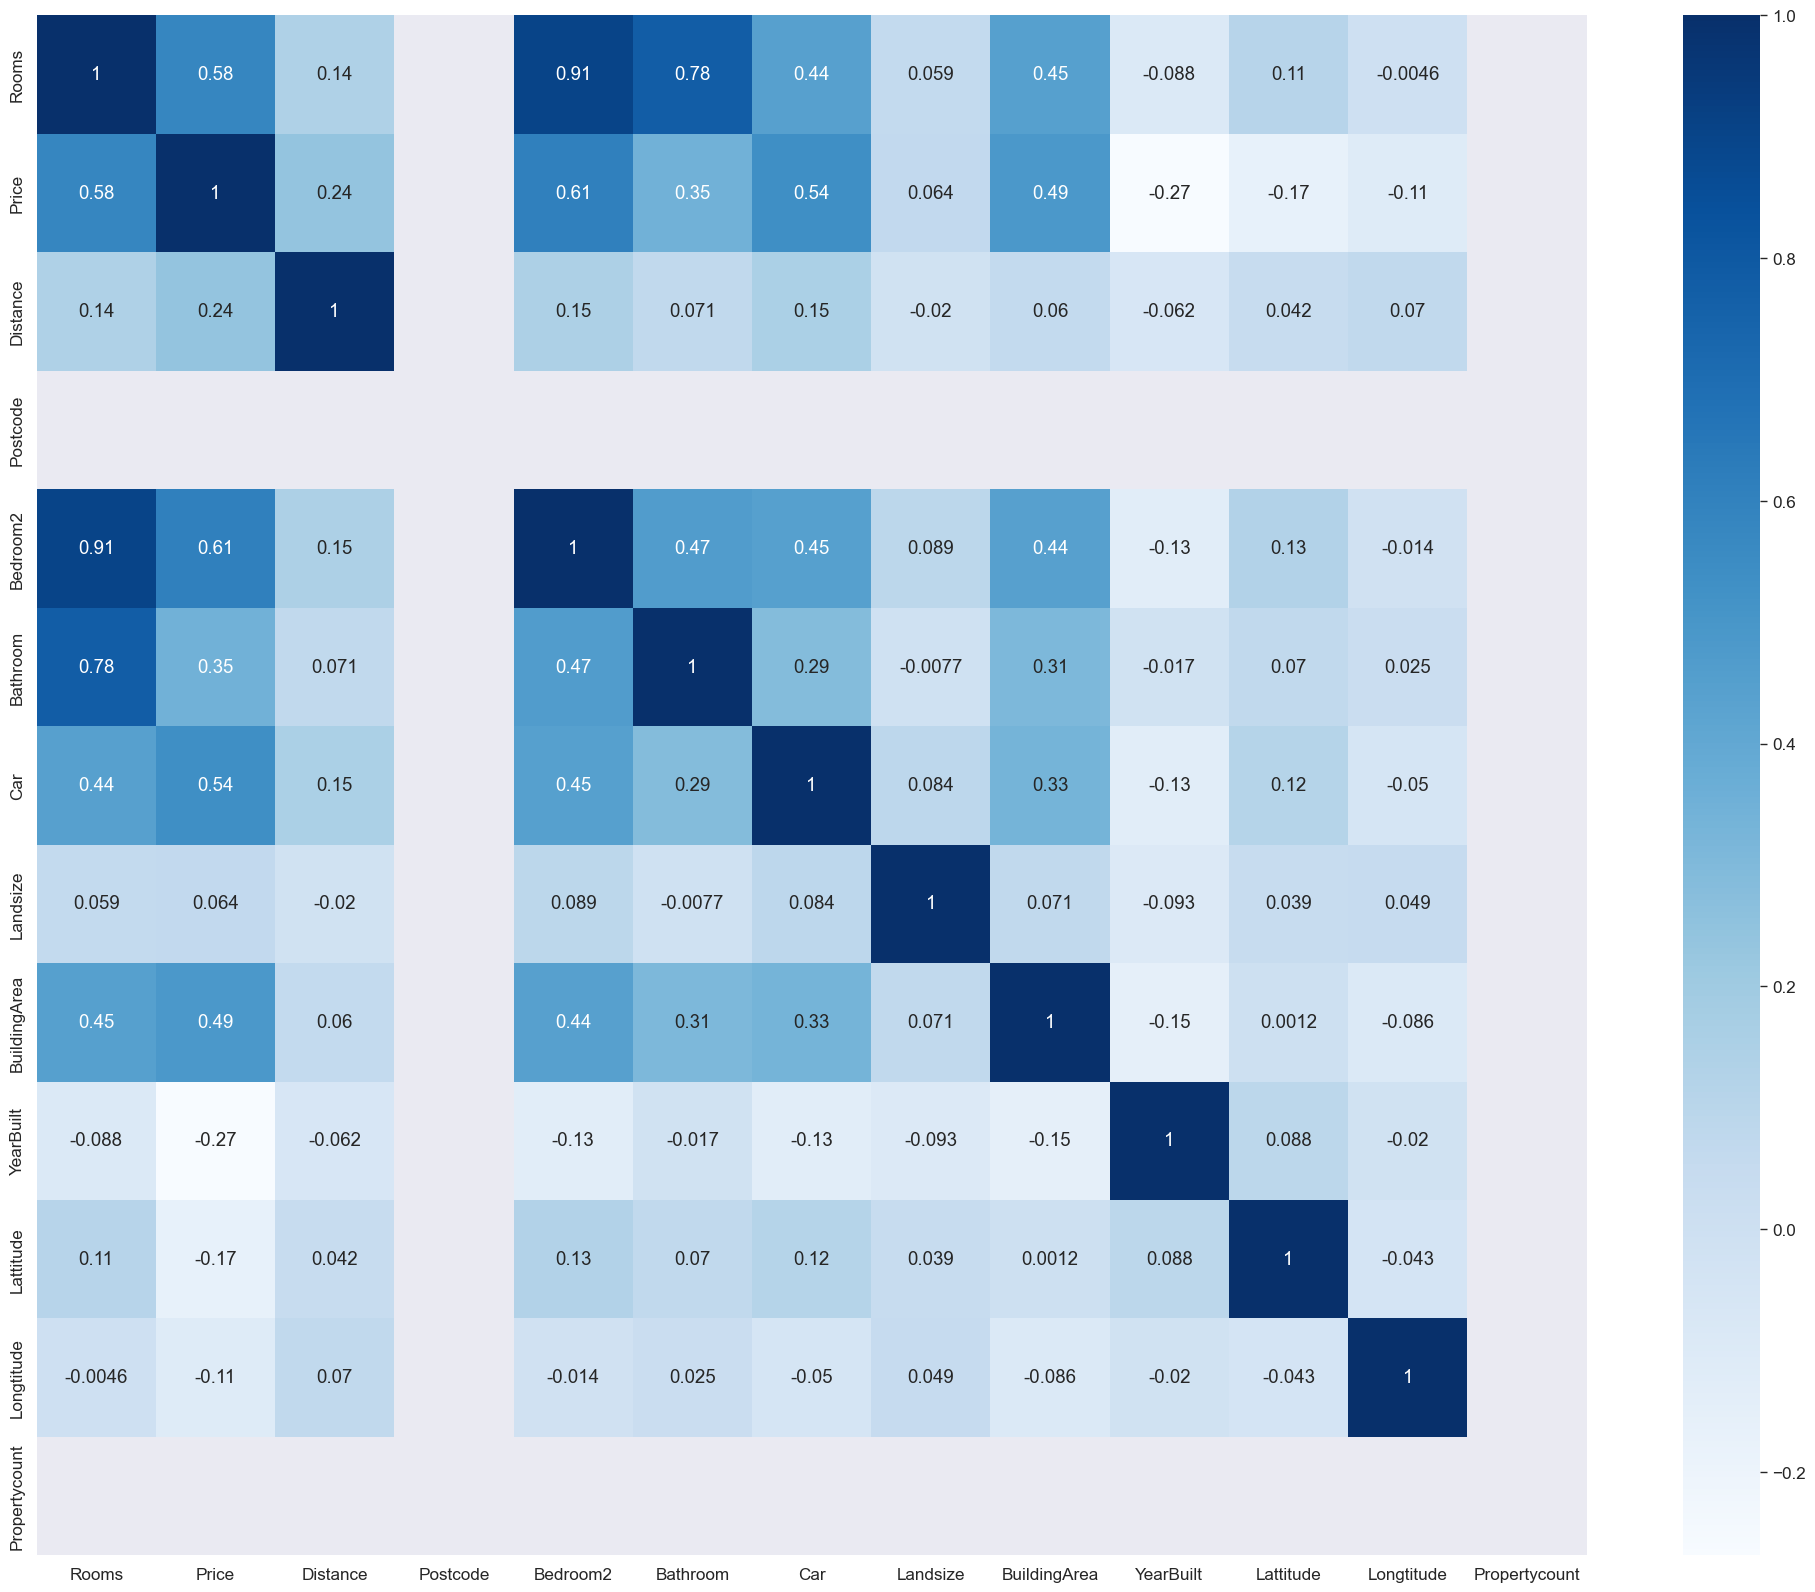

In [107]:
heatmap(resevoir)

C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\687331683.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



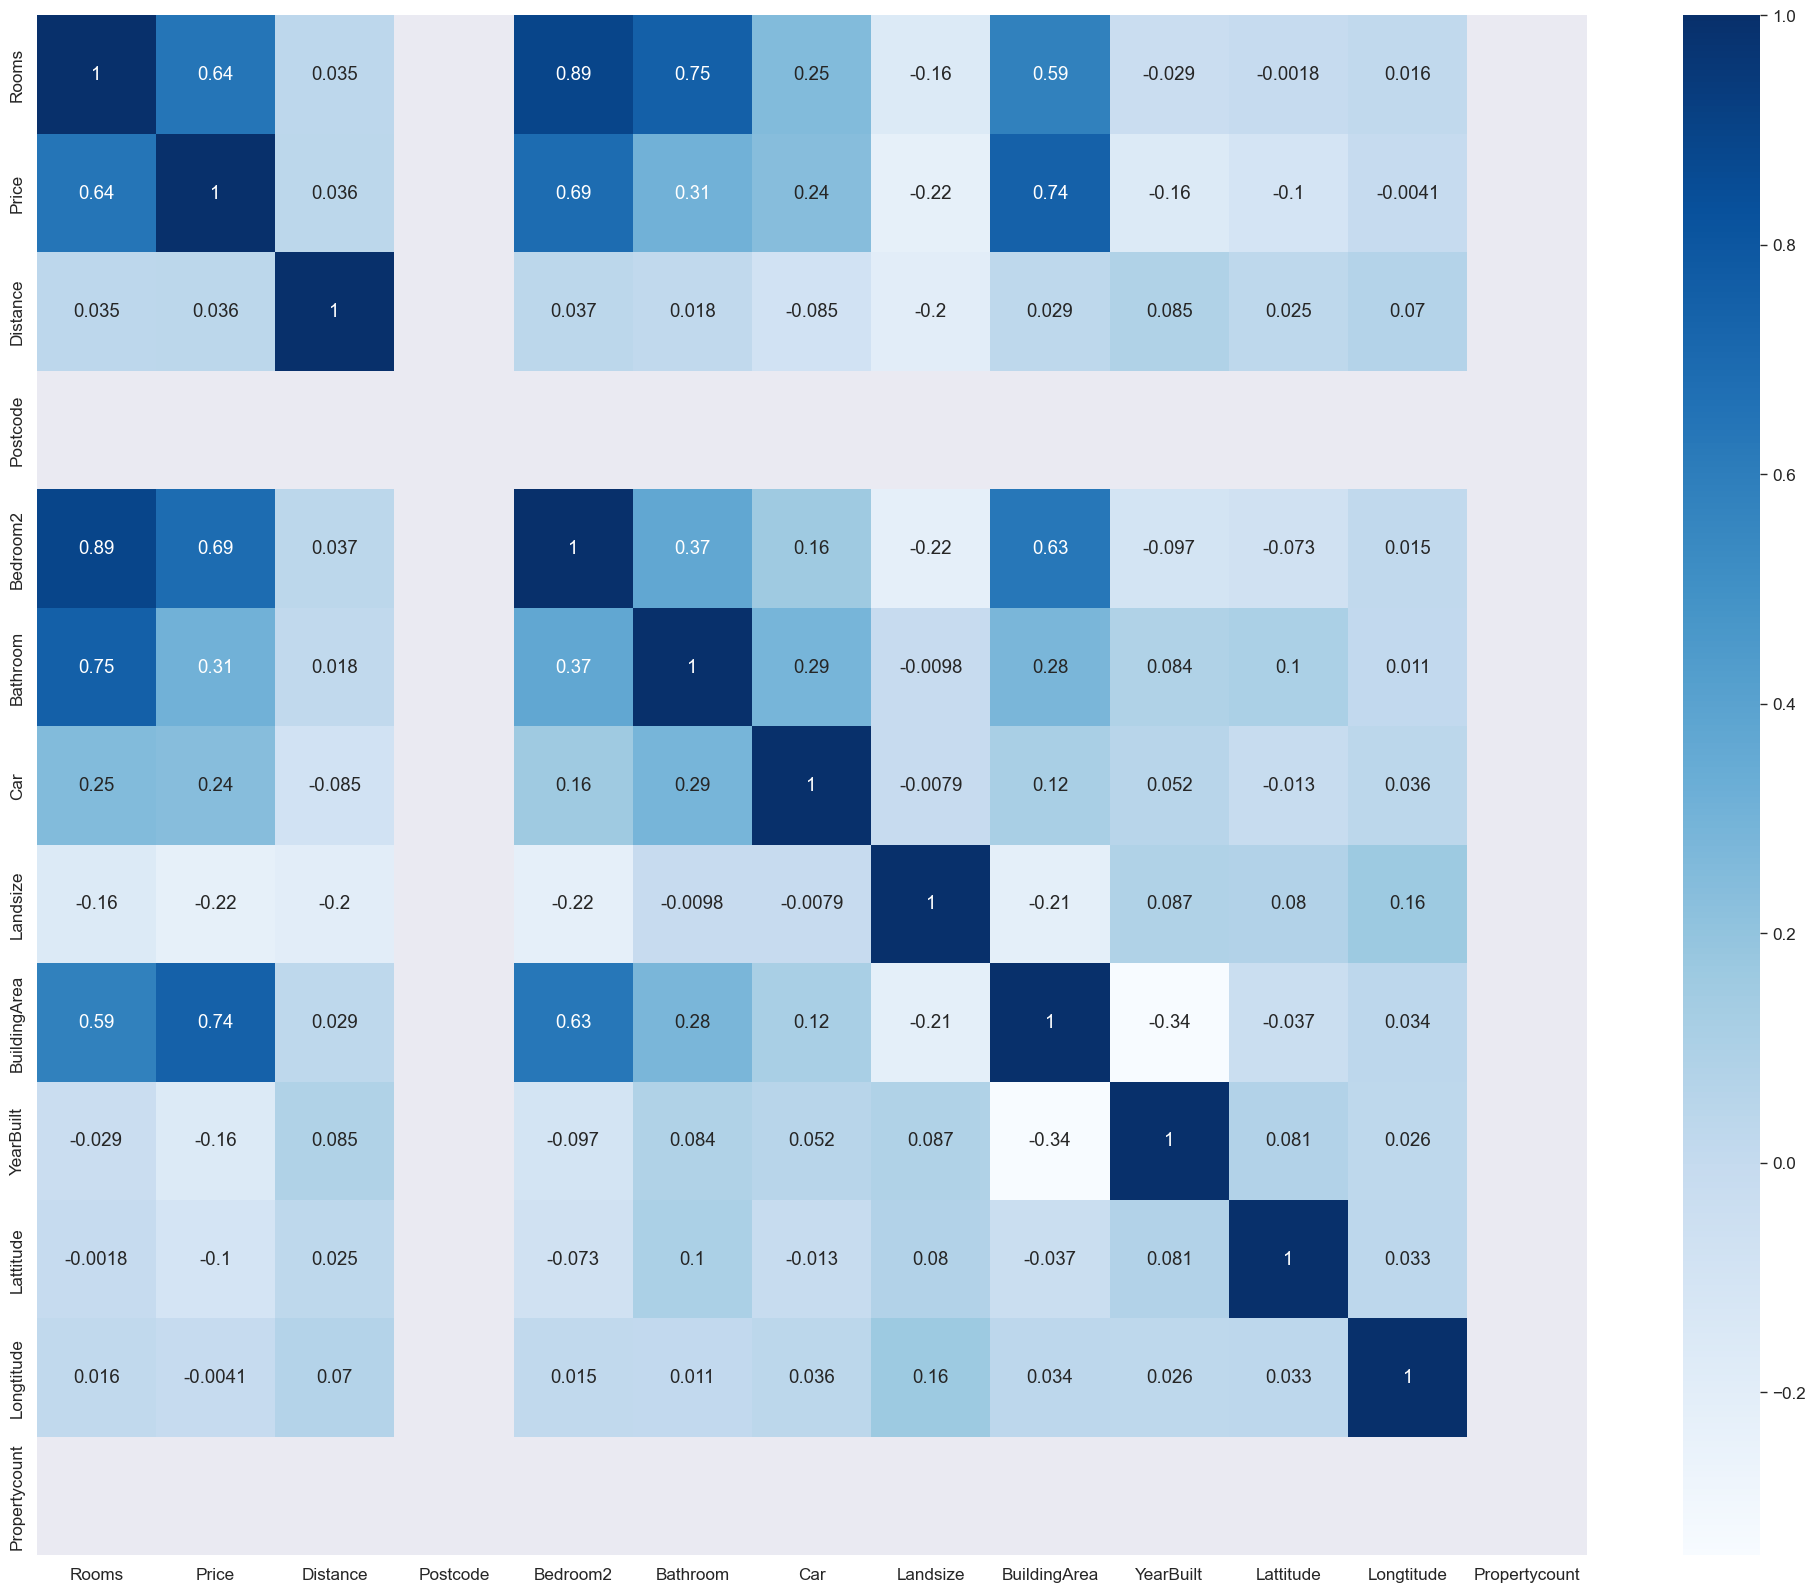

In [108]:
heatmap(richmond)

C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\687331683.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



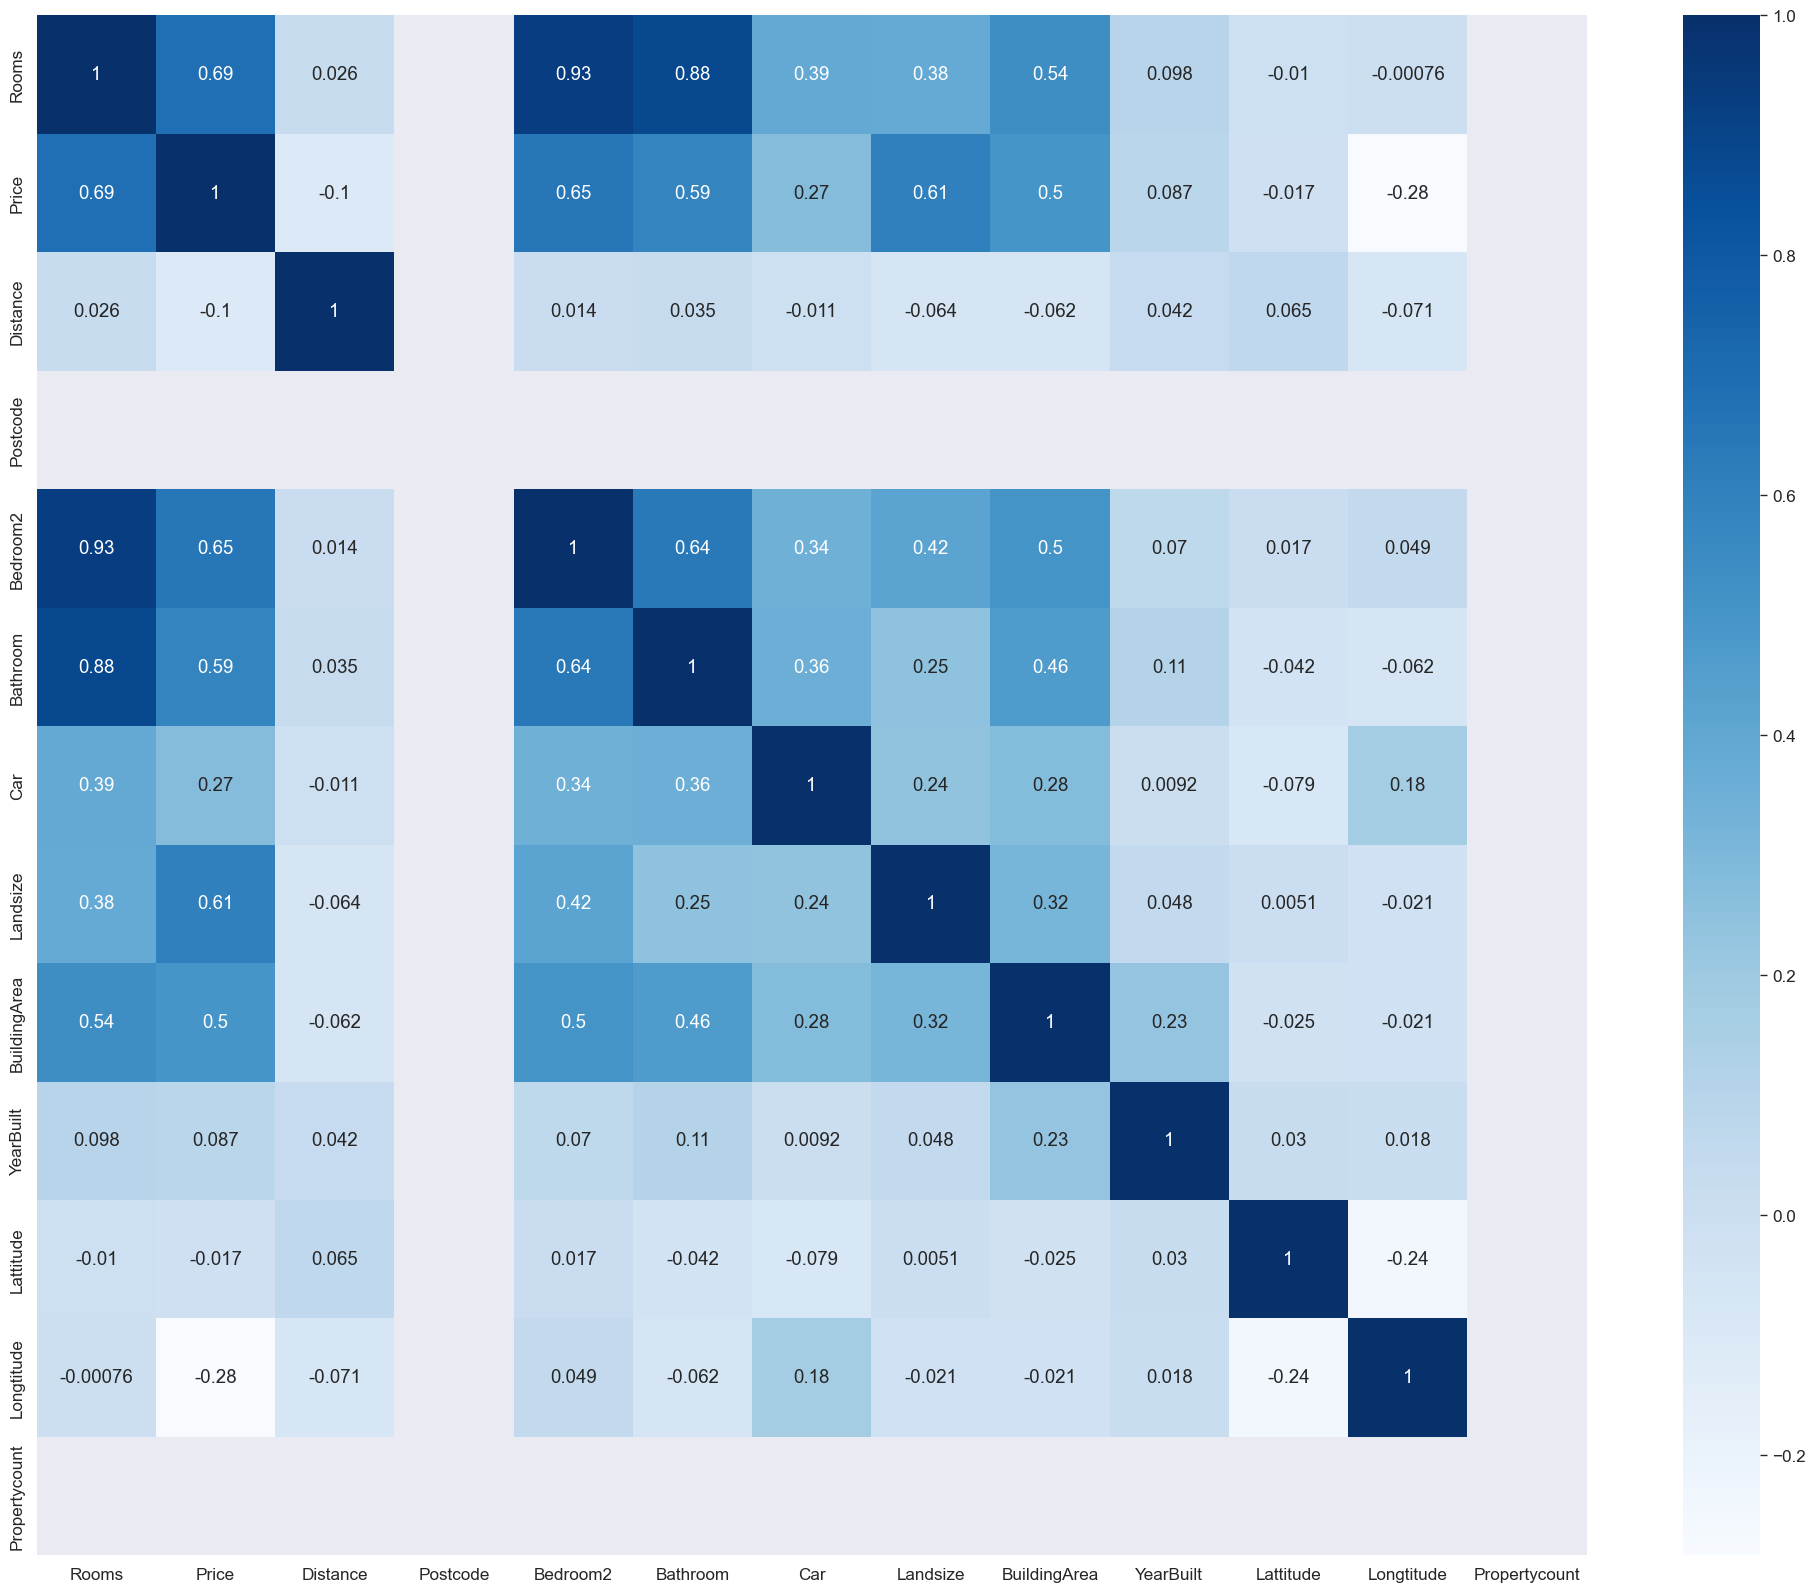

In [109]:
heatmap(brighteast)

- The three heatmaps shown above are for the three highest-selling suburbs for the dispaly of differing results as house prices are different in different areas in Melbourne. The highest-selling suburbs were chosen as they had the highest number of entries in the dataset.
- In Reservoir, the Pearson correlation for price and bedrooms is 0.61, above the p values of 0.48 across all of Melbourne.
- However in this suburb, the Pearson correlation for price and bathrooms is 0.35, which is below the correlation throughout all of Melbourne.
- The results are similar for Richmond, where the p-value for price and bedrooms was 0.69 and the p-value for price and bathrooms was 0.31.
- The results for Brighton East however, were different. The p-values for price, with bedrooms and bathrooms were 0.65 and 0.59 respectively.
- Pearson's correlations all over Melbourne: the price and the number of bedrooms in a house has a positive correlation of 0.49. The price and building area have a positive correlation of 0.28. The price and the number of bathrooms are positively correlated at 0.47. The most positive amount of correlation observed was with the number of bedrooms and the total number of rooms which was at 0.94, because the more bedrooms, the more rooms in general.

In [110]:
arr1=np.array(df["Price"])
arr2=np.array(df["Rooms"])
arr3=np.array(df["BuildingArea"])
arr4=np.array(df["Distance"])
arr5=np.array(df["Bedroom2"])
arr6=np.array(df["Bathroom"])
arr7=np.array(df['Car'])
arr8=np.array(df['Landsize'])
arr9=np.array(df['BuildingArea'])
arr10=np.array(df['Propertycount'])
arr11 = np.array(df["YearBuilt"])
arr12 = np.array(df["Date"])

In [111]:
np.corrcoef(arr1, arr2) 
np.corrcoef(arr1, arr3) 
np.corrcoef(arr1, arr4) 
np.corrcoef(arr1, arr5) 
np.corrcoef(arr1, arr6) 
np.corrcoef(arr1, arr7) 
np.corrcoef(arr2, arr5) 
np.corrcoef(arr2, arr3) 
np.corrcoef(arr1, arr11)
np.corrcoef(arr2, arr6) 

array([[1.        , 0.84680754],
       [0.84680754, 1.        ]])

- Pearson correlation: 0.53461438 between price and rooms.
- Pearson correlation: 0.3280872 between price and building area.
- Pearson correlation: -0.15797084 between price and distance.
- Pearson correlation: 0.4809081 between price and bedrooms.
- Pearson correlation: 0.47475867 between price and bathrooms.
- Pearson correlation: 0.91640259 between room numbers and bedrooms.
- Pearson correlation: 0.38175471 between room numbers and building area.
- Pearson correlation: -0.02409909 between price and the year built.
- Pearson correlation: 0.84680754 between the room numbers and number of bathrooms.

In [112]:
df[["Price", "Rooms"]].corr(method="spearman") 
df[["Price", "BuildingArea"]].corr(method="spearman") 
df[["Price", "Distance"]].corr(method="spearman") 
df[["Price", "Bedroom2"]].corr(method="spearman") 
df[["Price", "Bathroom"]].corr(method="spearman") 
df[["Price", "Car"]].corr(method="spearman") 

,Price,Car
Price,1.000000,0.297791
Car,0.297791,1.000000


- Spearman's rank: 0.543278 between price and rooms.
- Spearman's rank: 0.564229 between price and building area.
- Spearman's rank: -0.128044 between price and distance from CBD.
- Spearman's rank: 0.521744 between room numbers and building area.
- Spearman's rank: 0.427282 between room numbers and building area.
- Spearman's rank: 0.297791 between room numbers and building area.

### Calculating zscores for new columns to show the zscores for landsize, price and building area:
- Credits: Anu Ambekar

In [113]:
mean_price=df["Price"].mean() 
mean_std=df["Price"].std()
df["Price_ZScore"] = (df["Price"] - mean_price)/mean_std

C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\3123231723.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [114]:
mean_size=df["Landsize"].mean() 
mean_size_std=df["Landsize"].std()
df["Landsize_ZScore"] = (df["Landsize"] - mean_size)/mean_size_std

C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\334014944.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
mean_area=df["BuildingArea"].mean() 
mean_area_std=df["BuildingArea"].std()
df["BuildingArea_ZScore"] = (df["BuildingArea"] - mean_area)/mean_area_std

C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\1054447120.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Above, the numerical attributes were converted to an array format, and the zscores of each were calculated.

### Scatter plot of prices on landsize:
- Credits: Julian Ryan

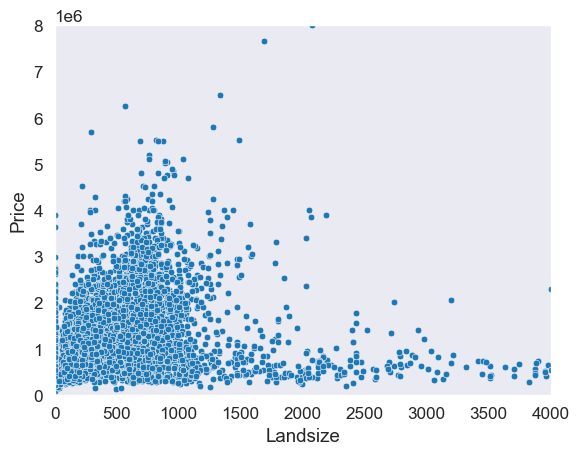

In [117]:
plot = sns.scatterplot(data=df, x=df["Landsize"], y=df["Price"])
plt.xlim(0, 4000)
plt.ylim(0, 8000000)
plt.show()

### Scatter plot for the year built and price: 
- Credits: Julian Ryan

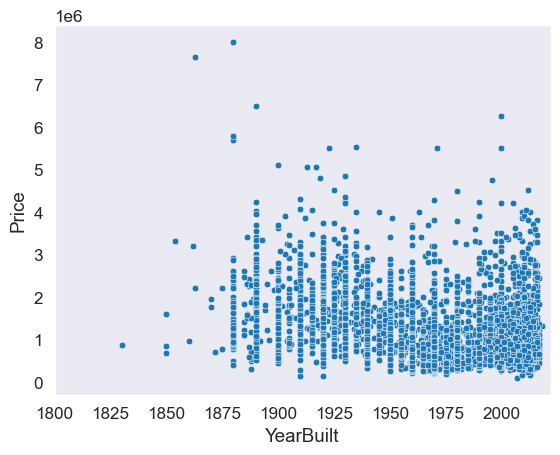

In [118]:
plot = sns.scatterplot(data=df, x=df["YearBuilt"], y=df["Price"])
plot.set_xlim(left=1800, right=2022)
plt.show()

### Log graph to measure relationship between year built and landsize.
- Credits: Julian Ryan

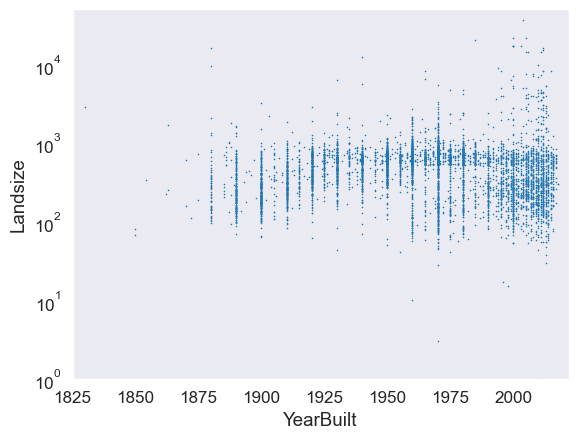

In [119]:
plot = sns.scatterplot(data=df, x=df["YearBuilt"], y=df["Landsize"], s=1, edgecolor=None)
plot.set_xlim(left=1825, right=2022)
plot.set_ylim(bottom=1, top=50000)
plot.set(yscale="log")
plt.show()

### Distribution plot. Displays the prices at which people are purchasing homes at different rates:
- Credits: Julian Ryan

C:\Users\anurag\AppData\Local\Temp\ipykernel_2412\834922981.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Price', ylabel='Density'>

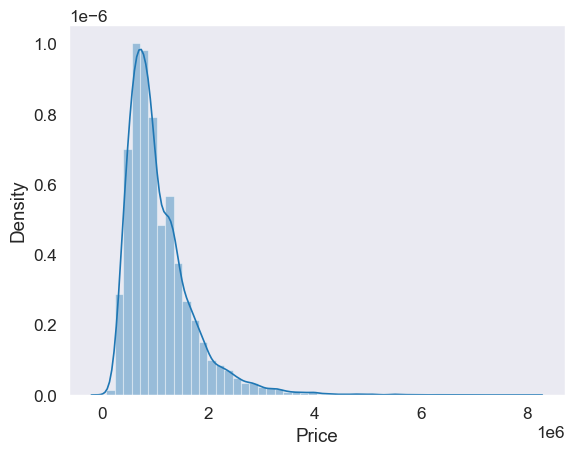

In [120]:
sns.distplot(df['Price'])

### Logarithmic scatterplot for price and landsize 

- For the Landsize and the Price, there is no correlation, which is surprising. For the YearBuilt and the Price variables, there is no obvious increase in the prices as time goes on. However, as time goes on, there are more houses built.
- Credits: Julian Ryan

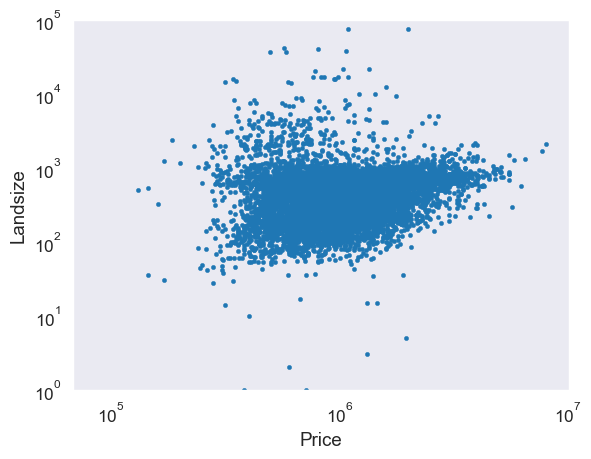

In [121]:
plot = sns.scatterplot(data=df, x=df['Price'], y=df['Landsize'], s=10, edgecolor=None)
plot.set_ylim(bottom=1, top=100000)
plot.set(xscale='log')
plot.set(yscale='log')
plt.show()

In [122]:
plot.set(yscale='log')
bottom_prices = (df_nozero['YearBuilt'].sort_values()[0:5149])
print(bottom_prices)
plt.show()

9962     1830
1752     1850
3659     1850
10720    1850
1739     1854
         ... 
7968     1983
2045     1983
1264     1983
12272    1983
9490     1983
Name: YearBuilt, Length: 5149, dtype: int32


In [123]:
df_filtered = df[df["YearBuilt"] != 0]
df_filtered["YearBuilt"].mode()

0    1970
Name: YearBuilt, dtype: int32

### Histplot to show which properties based on year built sold the most properties:
- Credits: Julian Ryan

(1820.0, 2018.0)

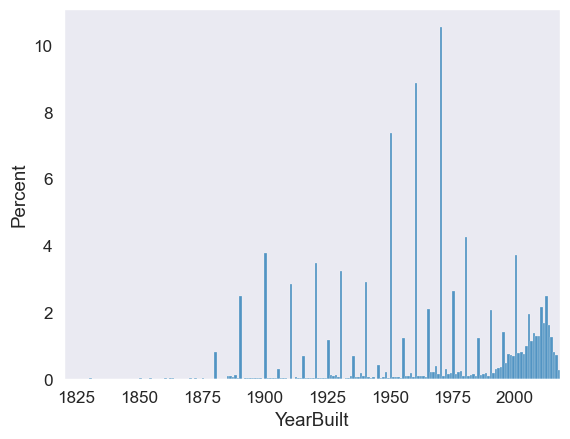

In [124]:
sns.histplot(df_nozero['YearBuilt'], stat='percent', bins=188)
plt.xlim(1820, 2018)